## Option A : Web scraping (à nouveau) Récupérer les tweets directement d'internet
snscrape is a scraper for social networking services (SNS). It scrapes things like user profiles, hashtags, or searches and returns the discovered items, e.g. the relevant posts, from various services: facoebook, instagram, Twitter....

#https://github.com/JustAnotherArchivist/snscrape

In [1]:
# installer si c pas déjà fait
##!{sys.executable} -m pip install snscrape

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import time

query = "(from:CCNUCC) until:2023-01-01 since:2015-01-01"

#On lance le chrono !
start = time.time()

tweets = []
# Attention mettez le nombre max de Tweets !
limit = 10000

#utiliser snsscrape pour scraper les tweets et les mettre dans une liste
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.id,tweet.username, tweet.content, tweet.lang, 
                       tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount,
                      tweet.quoteCount, tweet.media, tweet.sourceLabel, tweet.coordinates,tweet.place])

# créer un datframe qui contient tous les résultats
df = pd.DataFrame(tweets, columns=['Date', 'TweetID', 'User', 'Tweet', 'Langue', 'Hashtags','ReplyCount','RetweetCount',
                                  'LikeCount','Quotecount','Media', 'Source','coordinates','place'])

#On vérifie le temps d'execution !
end = time.time()
elapsed = end - start
print(f'Temps d\'exécution : {elapsed:.2}ms')

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28from%3ACCNUCC%29+until%3A2023-01-01+since%3A2015-01-01&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edi

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28from%3ACCNUCC%29+until%3A2023-01-01+since%3A2015-01-01&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [2]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.shape

In [ ]:
df.head(5)

In [ ]:
df['Source'].unique()

In [ ]:
df['Langue'].unique()

In [ ]:
df.tail(5)

In [ ]:
# to save to csv
#.to_csv('tweets_ONUClimat_Lise_BRISSET.csv')

In [ ]:
print(df['Tweet'][1])

In [ ]:
import numpy as np
import regex as re
from collections import Counter

In [ ]:
words = df['Tweet'].apply(lambda x:str(x).split())
top=Counter([item for sublist in words for item in sublist])

In [ ]:
words[1]

In [ ]:
top.most_common(21)

## Option B : télécharger votre coprus que vous avez déjà préparer !

In [3]:
# import necessary libraries
import pandas as pd
import os
import glob

In [4]:
# use glob to get all the csv files 
# in the folder
path = '/Users/liseb/tweets_ONUClimat_Lise_BRISSET.csv'

df = pd.read_csv(path,encoding='utf-8')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9759 entries, 0 to 9758
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    9759 non-null   int64 
 1   Date          9759 non-null   object
 2   TweetID       9759 non-null   int64 
 3   User          9759 non-null   object
 4   Tweet         9759 non-null   object
 5   Langue        9759 non-null   object
 6   Hashtags      9284 non-null   object
 7   ReplyCount    9759 non-null   int64 
 8   RetweetCount  9759 non-null   int64 
 9   LikeCount     9759 non-null   int64 
 10  Quotecount    9759 non-null   int64 
 11  Media         8061 non-null   object
 12  Source        9759 non-null   object
 13  coordinates   92 non-null     object
 14  place         92 non-null     object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [6]:
df.nunique()

Unnamed: 0      9759
Date            9755
TweetID         9759
User               1
Tweet           9753
Langue            15
Hashtags        4937
ReplyCount        19
RetweetCount     109
LikeCount        116
Quotecount        25
Media           7647
Source            11
coordinates       17
place             17
dtype: int64

In [7]:
# vérifians combien sont en francais ?
df.groupby(['Langue']).nunique()

,Unnamed: 0,Date,TweetID,User,Tweet,Hashtags,ReplyCount,RetweetCount,LikeCount,Quotecount,Media,Source,coordinates,place
Langue,,,,,,,,,,,,,,
ca,11,11,11,1,11,10,3,8,7,3,11,3,0,0
cs,1,1,1,1,1,1,1,1,1,1,1,1,0,0
da,1,1,1,1,1,1,1,1,1,1,1,1,0,0
en,24,24,24,1,24,19,2,8,8,2,17,4,2,2
es,7,7,7,1,7,5,3,7,6,2,5,3,0,0
fr,9630,9626,9630,1,9624,4861,19,109,116,25,7594,11,17,17
ht,1,1,1,1,1,1,1,1,1,1,1,1,0,0
it,1,1,1,1,1,1,1,1,1,1,0,1,0,0
pt,1,1,1,1,1,1,1,1,1,1,0,1,0,0


In [8]:
#Créer un copie de Travail
df_nd = df[['TweetID','Date','User','Tweet','Langue','Source']] .copy()
df_nd.shape

(9759, 6)

In [9]:
df_nd = df_nd[df_nd['Langue']=='fr']
df_nd.shape

(9630, 6)

In [10]:
df_nd = df_nd.drop_duplicates().copy()
df_nd.shape

(9630, 6)

In [11]:
## imports and definiations ##
import datetime
import time
import os
import calendar

#df.loc[:, 'year'] = pd.to_datetime(df_nd.Date, format='%Y-%B-%d::%H-%M').dt.year
df_nd.loc[:, 'year'] = pd.to_datetime(df_nd.Date, format='%Y-%m-%d %H:%M:%S').dt.year
df_nd.loc[:, 'month'] = pd.to_datetime(df_nd.Date, format='%Y-%m-%d %H:%M:%S').dt.month
df_nd['month_name'] = df_nd["month"].apply(lambda x: calendar.month_abbr[x])
cols=["month_name","year"]
df_nd['period'] = df_nd[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [12]:
df_nd

,TweetID,Date,User,Tweet,Langue,Source,year,month,month_name,period
0,1605524782144884736,2022-12-21 11:25:11+00:00,CCNUCC,"#LeSaviezVous ❓\n\nÀ la #COP15, les gouverneme...",fr,Twitter Web App,2022,12,Dec,Dec-2022
1,1604397184421691398,2022-12-18 08:44:31+00:00,CCNUCC,#IMD22\n❌ 22 millions de personnes déplacées d...,fr,Twitter for Android,2022,12,Dec,Dec-2022
2,1603024926318944256,2022-12-14 13:51:39+00:00,CCNUCC,Découvrez les 🔟 programmes du monde entier 🌍 r...,fr,Twitter for Advertisers,2022,12,Dec,Dec-2022
3,1602327666899787777,2022-12-12 15:41:00+00:00,CCNUCC,#LeSaviezVous❓\nLes pertes et gaspillage alime...,fr,Twitter Web App,2022,12,Dec,Dec-2022
4,1601159721221869571,2022-12-09 10:20:00+00:00,CCNUCC,« Il n'y a pas de planète B.\nC'est à nous de ...,fr,Twitter Web App,2022,12,Dec,Dec-2022
...,...,...,...,...,...,...,...,...,...,...
9754,559697355054665729,2015-01-26 13:00:22+00:00,CCNUCC,Soumettez vos actions innovantes pour le #clim...,fr,TweetDeck,2015,1,Jan,Jan-2015
9755,559644806914527233,2015-01-26 09:31:34+00:00,CCNUCC,Étudiants cherchant un stage? Venez travailler...,fr,TweetDeck,2015,1,Jan,Jan-2015
9756,558672538809532417,2015-01-23 17:08:07+00:00,CCNUCC,"MT @itele: @fhollande appelle à ""investir mass...",fr,TweetDeck,2015,1,Jan,Jan-2015
9757,558657151632412672,2015-01-23 16:06:58+00:00,CCNUCC,"RT @COP21: ""En décembre 2015, le monde aura re...",fr,TweetDeck,2015,1,Jan,Jan-2015


In [13]:
df_nd[['year','month']]

,year,month
0,2022,12
1,2022,12
2,2022,12
3,2022,12
4,2022,12
...,...,...
9754,2015,1
9755,2015,1
9756,2015,1
9757,2015,1


In [14]:
climat_year=[]
for i in df_nd.index:
    if df_nd['month'][i] >= 5:
        climat_year.append(df_nd['year'][i]-2015)
    else:
        climat_year.append(df_nd['year'][i]-2022)

In [15]:
df_nd['climat'] = climat_year
df_nd.groupby('climat').nunique()

,TweetID,Date,User,Tweet,Langue,Source,year,month,month_name,period
climat,,,,,,,,,,
-7,409,409,1,409,1,2,1,4,4,4
-6,804,804,1,804,1,3,1,4,4,4
-5,537,537,1,537,1,4,1,4,4,4
-4,246,246,1,246,1,4,1,2,2,2
-3,473,473,1,473,1,4,1,4,4,4
-2,153,153,1,153,1,4,1,4,4,4
-1,220,220,1,220,1,4,1,4,4,4
0,1785,1785,1,1784,1,10,2,12,12,12
1,1882,1882,1,1879,1,5,1,8,8,8


In [16]:
df_nd.head()

,TweetID,Date,User,Tweet,Langue,Source,year,month,month_name,period,climat
0,1605524782144884736,2022-12-21 11:25:11+00:00,CCNUCC,"#LeSaviezVous ❓\n\nÀ la #COP15, les gouverneme...",fr,Twitter Web App,2022,12,Dec,Dec-2022,7
1,1604397184421691398,2022-12-18 08:44:31+00:00,CCNUCC,#IMD22\n❌ 22 millions de personnes déplacées d...,fr,Twitter for Android,2022,12,Dec,Dec-2022,7
2,1603024926318944256,2022-12-14 13:51:39+00:00,CCNUCC,Découvrez les 🔟 programmes du monde entier 🌍 r...,fr,Twitter for Advertisers,2022,12,Dec,Dec-2022,7
3,1602327666899787777,2022-12-12 15:41:00+00:00,CCNUCC,#LeSaviezVous❓\nLes pertes et gaspillage alime...,fr,Twitter Web App,2022,12,Dec,Dec-2022,7
4,1601159721221869571,2022-12-09 10:20:00+00:00,CCNUCC,« Il n'y a pas de planète B.\nC'est à nous de ...,fr,Twitter Web App,2022,12,Dec,Dec-2022,7


# 2 - Initial Raw data analysis

## a - Densité du corpus !
https://seaborn.pydata.org/generated/seaborn.kdeplot.html
- longueur des Tweets 
- densité : A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [17]:
# Explore the data : lenght of the Tweets
df_nd['char_len'] = df_nd['Tweet'].apply(lambda x:len(x))
df_nd['word_len'] = df_nd['Tweet'].apply(lambda x:len(x.split(" ")))
df_nd.head()

,TweetID,Date,User,Tweet,Langue,Source,year,month,month_name,period,climat,char_len,word_len
0,1605524782144884736,2022-12-21 11:25:11+00:00,CCNUCC,"#LeSaviezVous ❓\n\nÀ la #COP15, les gouverneme...",fr,Twitter Web App,2022,12,Dec,Dec-2022,7,267,37
1,1604397184421691398,2022-12-18 08:44:31+00:00,CCNUCC,#IMD22\n❌ 22 millions de personnes déplacées d...,fr,Twitter for Android,2022,12,Dec,Dec-2022,7,275,37
2,1603024926318944256,2022-12-14 13:51:39+00:00,CCNUCC,Découvrez les 🔟 programmes du monde entier 🌍 r...,fr,Twitter for Advertisers,2022,12,Dec,Dec-2022,7,124,20
3,1602327666899787777,2022-12-12 15:41:00+00:00,CCNUCC,#LeSaviezVous❓\nLes pertes et gaspillage alime...,fr,Twitter Web App,2022,12,Dec,Dec-2022,7,198,23
4,1601159721221869571,2022-12-09 10:20:00+00:00,CCNUCC,« Il n'y a pas de planète B.\nC'est à nous de ...,fr,Twitter Web App,2022,12,Dec,Dec-2022,7,156,24


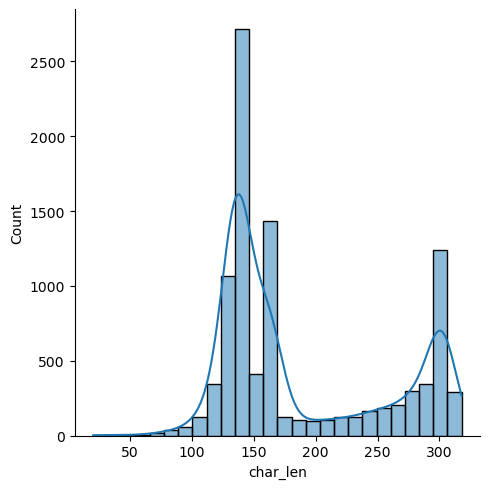

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(data = df_nd, x='char_len', kde=True)

plt.show()

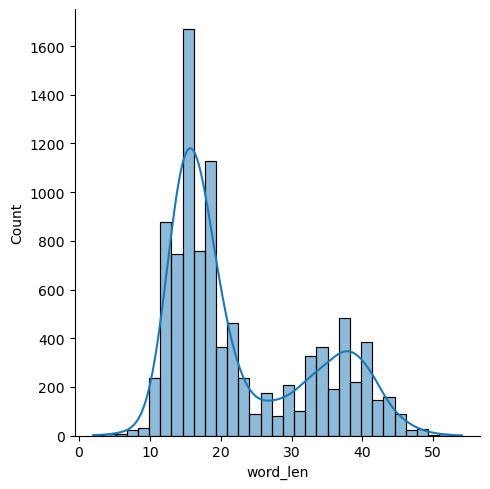

In [19]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

sns.displot(data = df_nd, x='word_len', kde=True)

plt.show()

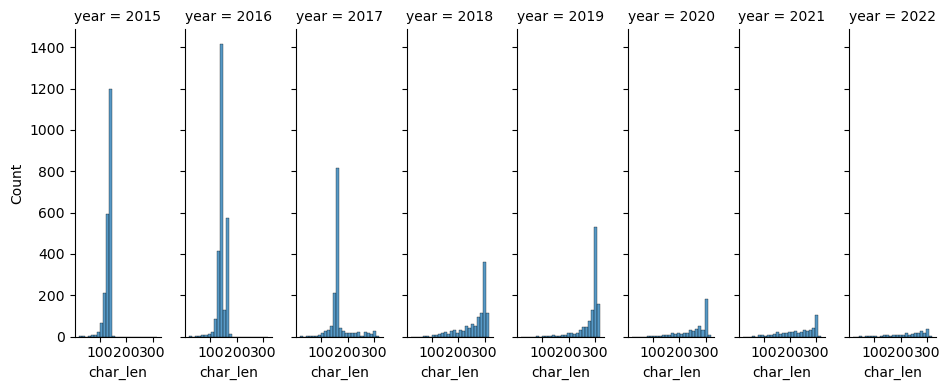

In [20]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

sns.displot(data = df_nd, x='char_len', col="year", height=4, aspect=.3)

plt.show()

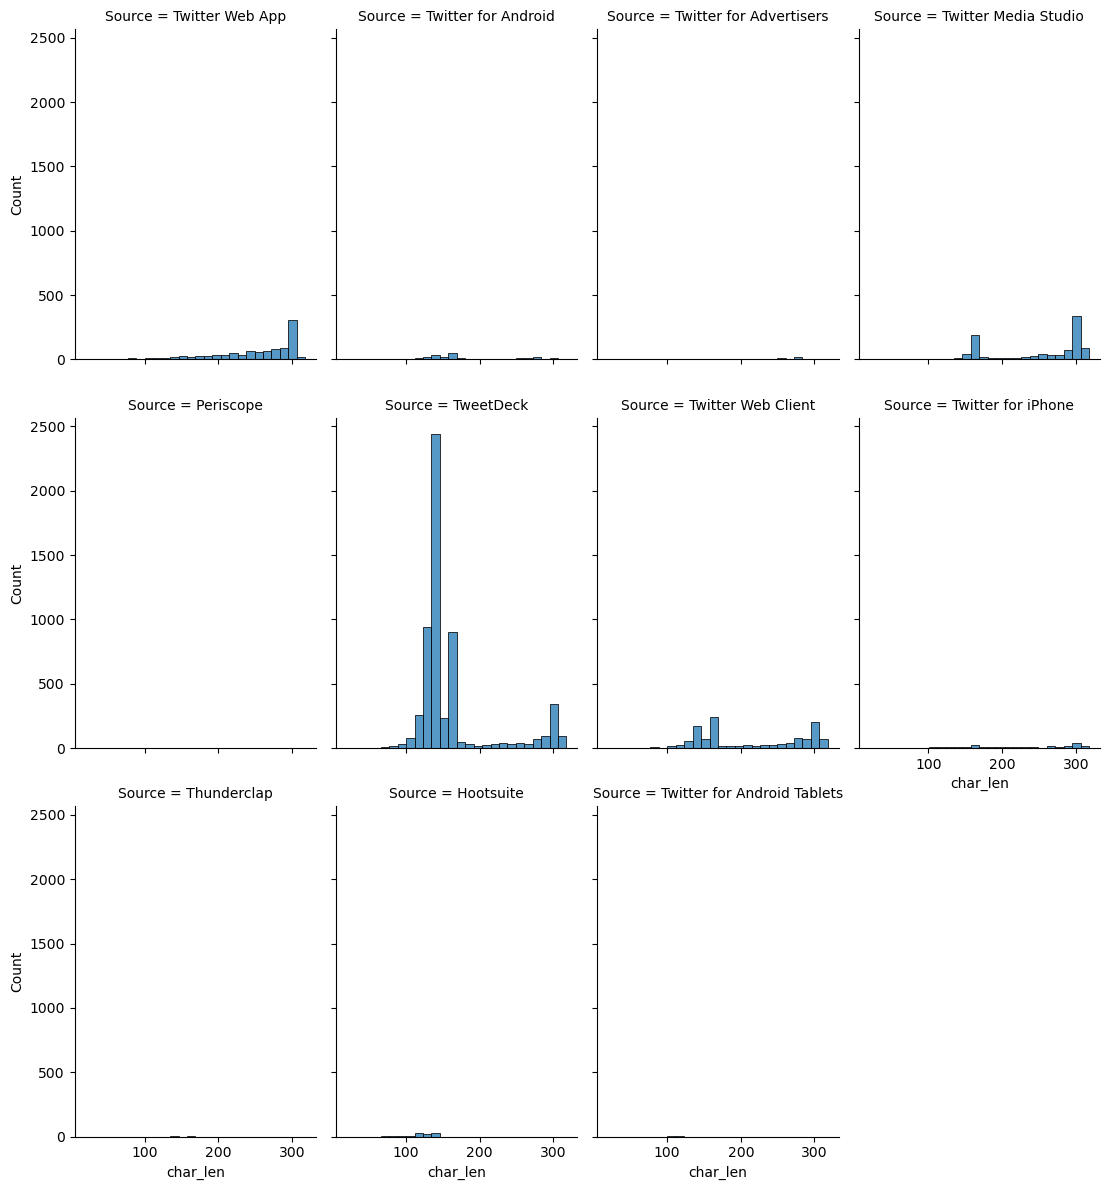

In [21]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

sns.displot(data = df_nd, x='char_len', col="Source", height=4, aspect=.7, col_wrap=4)

plt.show()

In [22]:
# Lineplot
g = sns.countplot(y='year', hue='Source',data=df_nd)

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Date")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

## b - Popular hashtags
##### For this, we will use regular expressions (included in the Python Library re) to create a pattern for detecting a hashtag inside the text. Then, we will create a dictionary with all the found hashtags, where the key is the hashtag text and the value is the number of times the hashtag has been posted.


In [23]:
import re
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"#[a-zA-Z]+")
hashtag_matches = list(df_nd['Tweet'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [24]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list =sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:200]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

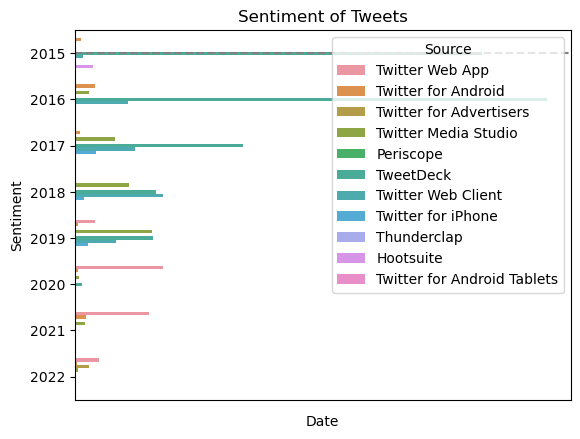

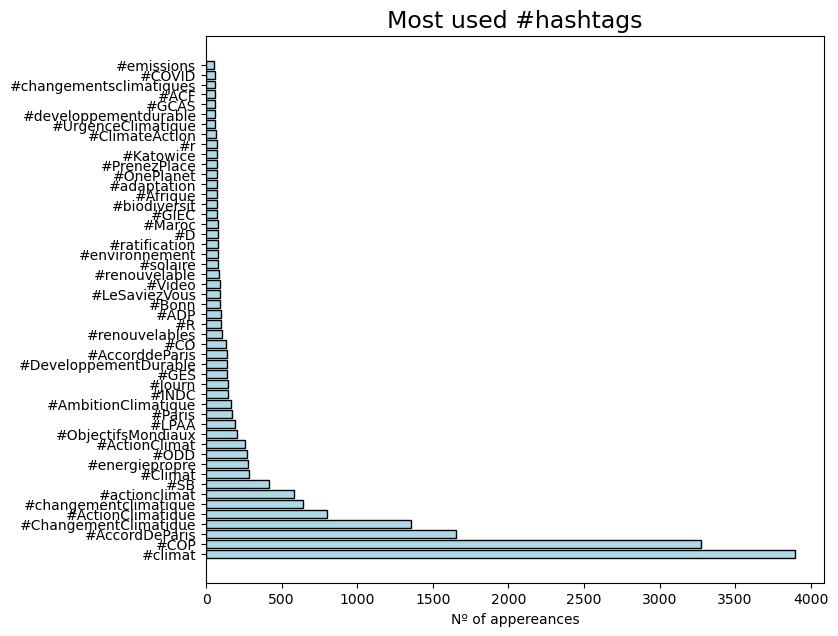

In [25]:
#Plotting a graph with the most used hashtags
import numpy as np
N= 50
fig, ax = plt.subplots(figsize = (9,7))
y_pos = np.arange(N)#len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values)[0:N], align='center', color = 'lightblue', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys)[0:N])
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 17)
plt.tight_layout(pad=3)
plt.show()

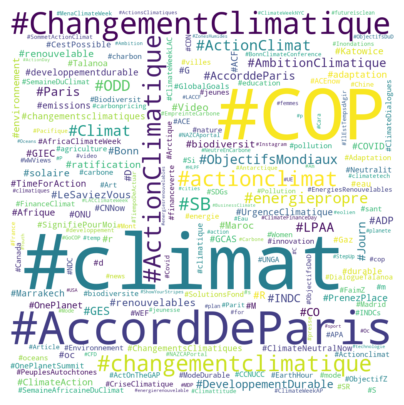

In [26]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
from wordcloud import WordCloud
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:200]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()

## c - Most frequent tokens


In [27]:
df_nd.groupby('period').nunique()

,TweetID,Date,User,Tweet,Langue,Source,year,month,month_name,climat,char_len,word_len
period,,,,,,,,,,,,
Apr-2015,113,113,1,113,1,1,1,1,1,1,29,15
Apr-2016,236,236,1,236,1,3,1,1,1,1,42,16
Apr-2017,139,139,1,139,1,4,1,1,1,1,39,19
Apr-2019,131,131,1,131,1,4,1,1,1,1,38,21
Apr-2020,40,40,1,40,1,3,1,1,1,1,34,18
...,...,...,...,...,...,...,...,...,...,...,...,...
Sep-2018,152,152,1,152,1,3,1,1,1,1,67,31
Sep-2019,27,24,1,27,1,4,1,1,1,1,26,14
Sep-2020,38,38,1,38,1,2,1,1,1,1,23,21


In [28]:
#group data and display as line chart
df_nd.groupby('period')['Tweet'].nunique().plot(legend=True)

<AxesSubplot:xlabel='period'>

In [29]:
list_period=df_nd["period"].drop_duplicates().tolist()
list_period

['Dec-2022',
 'Nov-2022',
 'Oct-2022',
 'Sep-2022',
 'Aug-2022',
 'Jul-2022',
 'Jun-2022',
 'May-2022',
 'Apr-2022',
 'Mar-2022',
 'Feb-2022',
 'Jan-2022',
 'Dec-2021',
 'Nov-2021',
 'Oct-2021',
 'Sep-2021',
 'Aug-2021',
 'Jul-2021',
 'Jun-2021',
 'May-2021',
 'Apr-2021',
 'Mar-2021',
 'Feb-2021',
 'Jan-2021',
 'Dec-2020',
 'Nov-2020',
 'Oct-2020',
 'Sep-2020',
 'Aug-2020',
 'Jul-2020',
 'Jun-2020',
 'May-2020',
 'Apr-2020',
 'Mar-2020',
 'Feb-2020',
 'Jan-2020',
 'Dec-2019',
 'Nov-2019',
 'Oct-2019',
 'Sep-2019',
 'Aug-2019',
 'Jul-2019',
 'Jun-2019',
 'May-2019',
 'Apr-2019',
 'Mar-2019',
 'Feb-2019',
 'Jan-2019',
 'Dec-2018',
 'Nov-2018',
 'Oct-2018',
 'Sep-2018',
 'Aug-2018',
 'Jul-2018',
 'Jun-2018',
 'Feb-2018',
 'Jan-2018',
 'Dec-2017',
 'Nov-2017',
 'Oct-2017',
 'Sep-2017',
 'Aug-2017',
 'Jul-2017',
 'Jun-2017',
 'May-2017',
 'Apr-2017',
 'Mar-2017',
 'Feb-2017',
 'Jan-2017',
 'Dec-2016',
 'Nov-2016',
 'Oct-2016',
 'Sep-2016',
 'Aug-2016',
 'Jul-2016',
 'Jun-2016',
 'May-2016',

In [30]:
# créer une liste regroupant tous les Tweets
list_tweets =df_nd['Tweet'].tolist()
# créer une liste regroupant tous les Tweets par mois 
Collection = [ ]
for p in list_period:
    Collection.append(df_nd['Tweet'][df_nd["period"] == p].tolist())
    
len(Collection)

93

In [31]:
print(Collection[0][0:5])
#le mois de janvier, les  premiers tweets

["#LeSaviezVous ❓\n\nÀ la #COP15, les gouvernements se sont engagés à protéger 30% des terres et des eaux considérées comme importantes pour la #biodiversité d'ici à 2030.\n\nQu'est-ce que ça veut dire ? Voyez par vous même :\nhttps://t.co/k57sPRZ8hY https://t.co/AgRDh9cT9n", "#IMD22\n❌ 22 millions de personnes déplacées du fait d'évènements météorologiques extrêmes chaque année\n❌ Sans action urgente, le nombre de personnes pourrait atteindre 216 millions d'ici 2050!\n\nÈcoutez notre entretien exclusif #COP27 avec @CarolineCDumas  pour en savoir ➕️\n👇", "Découvrez les 🔟 programmes du monde entier 🌍 récompensés par l'@ONU_fr pour leur rôle dans la restauration du monde naturel.", '#LeSaviezVous❓\nLes pertes et gaspillage alimentaires représentent entre8⃣% et🔟% des #émissions de gaz à effet de serre, chaque année. \n\nComment❓\n@FAOenFrancais nous en dit➕\n👇 https://t.co/MZm0wo3TMS', "« Il n'y a pas de planète B.\nC'est à nous de réparer le monde que nous avons. » @antonioguterres\n\n#C

In [32]:
# Lets Tokenize the Text
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

#Create a list of all words
all_words = ' '.join([tweet for tweet in df_nd['Tweet']])

In [33]:
# Lets Tokenize the Text
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

list_tweets_Tokenized = [word_tokenize(tweet, language="french") for tweet in list_tweets]

In [34]:
list_tweets_Tokenized[2][0:10]

['Découvrez',
 'les',
 '🔟',
 'programmes',
 'du',
 'monde',
 'entier',
 '🌍',
 'récompensés',
 'par']

In [35]:
# print the 20 most commons tokens
from collections import Counter
all_tokens = sum(list_tweets_Tokenized, [])
print(Counter(all_tokens).most_common(20))

[('#', 24799), (':', 18799), ('https', 13021), ('de', 10256), ('@', 8517), ('la', 6039), ('à', 5004), ('.', 4547), (',', 4466), ('le', 4372), ('climat', 4280), ('les', 3493), ('des', 3204), ('pour', 2855), ('en', 2781), ('l', 2777), ("'", 2771), ('du', 2666), ('et', 2468), ('http', 2367)]


In [36]:
# Lets remove Stopwords !
french_stopwords = set(stopwords.words('french'))
filtre_stopfr =  lambda text: [token for token in text if token.lower() not in french_stopwords]

tokens_Filtered=filtre_stopfr( all_tokens)
print(Counter(tokens_Filtered).most_common(50))

[('#', 24799), (':', 18799), ('https', 13021), ('@', 8517), ('.', 4547), (',', 4466), ('climat', 4280), ("'", 2771), ('http', 2367), ('!', 2082), (';', 1996), ('&', 1979), ('COP21', 1707), ('amp', 1669), ('AccordDeParis', 1638), ('ChangementClimatique', 1347), ('’', 1342), ('pr', 1246), ('COP22', 967), ('?', 816), ('ActionClimatique', 794), ('a', 739), ('ONU_fr', 711), ('CCNUCC', 672), ('changementclimatique', 640), ("''", 633), ('``', 609), ('actionclimat', 583), ('pays', 569), ('plus', 556), ('climatique', 500), ('-', 495), (')', 482), ('COP23', 476), ('👉', 470), ('COP24', 455), ('(', 443), ('contre', 440), ('mondiale', 401), ('«', 390), ('»', 388), ('monde', 382), ('%', 381), ('émissions', 350), ('via', 346), ('PEspinosaC', 344), ('Climat', 342), ('conférence', 336), ('faire', 331), ('+', 302)]


In [37]:
# Lets remove punctiation !
filtre_punctuations =  lambda text: [re.sub(r'[^\w\s]', '', token) for token in text]
tokens_Filtered=filtre_punctuations( all_tokens)
print(Counter(tokens_Filtered).most_common(50))

[('', 79610), ('https', 13535), ('de', 10299), ('la', 6057), ('à', 5010), ('le', 4383), ('climat', 4291), ('les', 3502), ('des', 3214), ('pour', 2865), ('en', 2803), ('l', 2794), ('du', 2676), ('et', 2478), ('http', 2367), ('sur', 2213), ('COP21', 1708), ('amp', 1669), ('AccordDeParis', 1641), ('au', 1467), ('ChangementClimatique', 1351), ('pr', 1247), ('un', 1135), ('Le', 1117), ('est', 1093), ('La', 1062), ('COP22', 967), ('Les', 924), ('dans', 901), ('que', 856), ('une', 852), ('ActionClimatique', 797), ('d', 746), ('a', 740), ('ONU_fr', 714), ('CCNUCC', 675), ('nous', 665), ('par', 643), ('changementclimatique', 640), ('aux', 596), ('notre', 585), ('actionclimat', 583), ('pays', 571), ('plus', 559), ('avec', 556), ('qui', 555), ('se', 537), ('sont', 504), ('climatique', 504), ('COP23', 476)]


## d - Est-ce que vous voyez d'autres éléments à exclure?


# 3 - Pre-Processing Twitter Corpus
Les prétraitement de votre corpus va dépendre en grande partie à la qualité de vos données.
Il faut toutefois garder à l’esprit que certains des prétraitement ne sont pas nécessaires selon le modèle de machine learning que vous utiliserez par la suite ! 

In [38]:
# Load packages
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_english  = set(stopwords.words('english'))
stop_words_french   = set(stopwords.words('french'))
stop_words_specific = ["'", "le","ce","de","cest","celui","ne"]
stop_words          = set(stopwords.words('french') + stopwords.words('english') + stop_words_specific)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liseb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liseb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## étape 1 : Basic Cleaning - à adapter à votre corpus/imagination !

- Remove Unicode Strings and Noise
- Remove/Replace URLs, User Mentions and Hashtags
- Non-Letter characters: numbers, emojis, or hash marks.
- Remove/Replace Slang and Abbreviations
- Remove/Replace Contractions
- Remove/Replace Numbers
- Remove/Replace Repetitions of Punctuation
- Remove Punctuation
- Handling Capitalized Words / Lowercase
- Replace Elongated Words (ex: hahahaaaa, ‘Duuuuude, that's awful,’”)

https://pynative.com/python-regex-replace-re-sub/

In [39]:
#the following pre-tokenization receives string as input parameter
#and returns string as output
import re
#import contractions

def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet) # remove Twitter links
    return tweet

def remove_tags(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    tweet = re.sub('RT @[\w_]+:','', tweet)  # remove retweet label
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

punctuation = '!”$%&\’()*+,-./:;<=>?[\\]^_`{|}~•@``'
def remove_nonText(tweet):
    tweet = re.sub('[' + punctuation + ']+', '', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub(r'\n','', tweet)  # remove escape sequence
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet) # un exemple d'image que vous pouvez compléter !

    return tweet

#def remove_contraction(text):
  #  return ' '.join([contractions.fix(word) for word in text.split()])

def pretokenization_cleaning(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    tweet = remove_links(tweet)
    tweet = remove_tags(tweet)
    tweet = remove_users(tweet)
    tweet = remove_nonText(tweet)
#    tweet = remove_contraction(tweet) # English only !
    return tweet

In [40]:
Text=Collection[0][0]
print(Text)

#LeSaviezVous ❓

À la #COP15, les gouvernements se sont engagés à protéger 30% des terres et des eaux considérées comme importantes pour la #biodiversité d'ici à 2030.

Qu'est-ce que ça veut dire ? Voyez par vous même :
https://t.co/k57sPRZ8hY https://t.co/AgRDh9cT9n


In [41]:
pretokenization_cleaning(Text)

" ❓ À la les gouvernements se sont engagés à protéger  des terres et des eaux considérées comme importantes pour la é d'ici à  Qu'estce que ça veut dire Voyez par vous même "

#### Librarie Spacy 
SpaCy est une bibliothèque Python open source pour le traitement du texte et des langues naturelles. Créé par l’équipe de la startup Explosion AI, spaCy a été publiée sous la licence MIT en 2015 et ses principaux développeurs sont Matthew Honnibal et Ines Montani, les fondateurs de la startup.
- Contrairement à NLTK, qui est largement utilisé pour l’enseignement et la recherche, spaCy est conçu pour l’utilisation de production sur de grandes quantités de textes avec une excellente performance et précision
- Il prend en charge des modèles statistiques pour 21 langues dont le français, l’anglais, l’allemand, l’espagnol, l’italien, le portugais et le néerlandais. 
- Vous pouvez écouter le tuto de Clément Plancq ! https://github.com/clement-plancq/tuto-mate

In [42]:
# installer Spacy dans terminal
#conda install -c conda-forge spacy
#!pip install -U spacy

In [43]:
#!python3 -m spacy download fr_core_news_md
#conda install -c conda-forge spacy-model-fr_core_news_md

## étape 2 : Normalising data  - à adapter à votre corpus 
- Spelling Correction
- Replace Negations with Antonyms
- Handling Capitalized Words
- Lowercase
- Tokenization
- Remove Stopwords (ex: the, and….)
- Stemming / racinisation (optional)
- Lemmatizing (optional)

In [44]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
import spacy
from spacy.lang.fr.examples import sentences 
stemmer = SnowballStemmer(language='french')
nlp = spacy.load("fr_core_news_md")

def tokenize(text):
    tknzr = TweetTokenizer(reduce_len=True)
    return tknzr.tokenize(text)

def remove_stopwords(text):
#    return " ".join([token for token in text if token.lower() not in stop_words])
    return [token for token in text if token.lower() not in stop_words_french]

def stemming(text):
    return [stemmer.stem(token) for token in text]

def lemmatizing(text):
    Text = " ".join([token for token in text])
    doc = nlp(Text)
    return [token.lemma_ for token in doc]

D:\Programmes\Anaconda\lib\site-packages\spacy\util.py:887: UserWarning: [W095] Model 'fr_core_news_md' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [45]:
print(lemmatizing(tokenize(Text)))

['#', 'LeSaviezVous', '❓', 'à', 'le', '#', 'COP15', ',', 'le', 'gouvernement', 'se', 'être', 'engager', 'à', 'protéger', '30', 'pourcent', 'de', 'terre', 'et', 'un', 'eau', 'considérer', 'comme', 'important', 'pour', 'le', '#', 'biodiversité', 'de', 'ici', 'à', '2030', '.', 'que', 'être', '-ce', 'que', 'cela', 'vouloir', 'dire', '?', 'voir', 'par', 'vous', 'même', ':', 'https://t.co/k57sprz8hy', 'https://t.co/agrdh9ct9n']


In [46]:
# to add stopwors to your list 
#stop_words_french

In [47]:
def preprocess_tweet(tweet):
    """Main master function to clean and normalizing tweets, and tokenizing / Lemmatization"""
    tweet = remove_links(tweet)
    tweet = remove_tags(tweet)
    tweet = remove_users(tweet)
    tweet = remove_nonText(tweet)
 #   tweet = remove_contraction(tweet) # English only
    tweet = tweet.lower()  # lower case
    tweet = tokenize(tweet)  # apply tokenization
    tweet = remove_stopwords(tweet)
#    tweet = stemming(tweet) # Optionnel 
    tweet = lemmatizing(tweet) # Optionnel
    return tweet

In [48]:
# créer une liste regroupant tous les Tweets
list_tweets_clean = [ ]
for tweets in list_tweets:
    list_tweets_clean.append(preprocess_tweet(tweets))

In [49]:
print(lemmatizing(tokenize(Text)))

['#', 'LeSaviezVous', '❓', 'à', 'le', '#', 'COP15', ',', 'le', 'gouvernement', 'se', 'être', 'engager', 'à', 'protéger', '30', 'pourcent', 'de', 'terre', 'et', 'un', 'eau', 'considérer', 'comme', 'important', 'pour', 'le', '#', 'biodiversité', 'de', 'ici', 'à', '2030', '.', 'que', 'être', '-ce', 'que', 'cela', 'vouloir', 'dire', '?', 'voir', 'par', 'vous', 'même', ':', 'https://t.co/k57sprz8hy', 'https://t.co/agrdh9ct9n']


In [50]:
list_tweets_clean[0][0:100]

['❓',
 'gouvernement',
 'engager',
 'protéger',
 'terre',
 'eau',
 'considérer',
 'comme',
 'important',
 'é',
 'de',
 'ici',
 'que',
 'estce',
 'cela',
 'vouloir',
 'dire',
 'voir']

In [51]:
# lets find the most frequent words
from nltk.probability import FreqDist
from collections import Counter
#Create a list of all words
all_tokens_clean = sum(list_tweets_clean, [])
fdist_normalized = FreqDist(all_tokens_clean)

In [52]:
print( "Top 100 des tokens les plus fréquents du compte ONUClimat France : ---" , fdist_normalized.most_common(100))  

Top 100 des tokens les plus fréquents du compte ONUClimat France : --- [('le', 2958), ("'", 2663), ('de', 1956), ('amp', 1629), ('"', 1231), ('pour', 1127), ('👉', 949), ('avoir', 930), ('#', 829), ('climatique', 760), ('mondial', 722), ('ce', 651), ('être', 642), ('plus', 635), ('️', 622), ('faire', 599), ('action', 592), ('tout', 581), ('pouvoir', 541), ('pays', 541), ('climat', 480), ('conférence', 447), ('contre', 442), ('se', 440), ('devoir', 425), ('ici', 408), ('émission', 396), ('«', 390), ('»', 388), ('nouveau', 381), ('plan', 370), ('via', 365), ('rapport', 359), ('jour', 355), ('objectif', 345), ('changement', 326), ('mettre', 325), ('degré', 323), ('semaine', 321), ('vidéo', 316), ('atteindre', 304), ("aujourd'hui", 297), ('heure', 287), ('suivre', 283), ('un', 281), ('🌍', 266), ('direct', 266), ('monde', 265), ('année', 262), ('➕', 261), ('lors', 244), ('présenter', 240), ('énergie', 238), ('comment', 237), ('pari', 237), ('voir', 231), ('ds', 221), ('face', 216), ('partici

In [53]:
# créer une liste regroupant tous les textes
Collection_clean = [ ]

for i in range(len(Collection)):
    Collection_clean.append([preprocess_tweet(text) for text in Collection[i]])

In [54]:
for text in Collection_clean[0][0:10]:
    print(text)

['❓', 'gouvernement', 'engager', 'protéger', 'terre', 'eau', 'considérer', 'comme', 'important', 'é', 'de', 'ici', 'que', 'estce', 'cela', 'vouloir', 'dire', 'voir']
['❌', 'million', 'personne', 'déplacer', 'faire', 'de', 'évènement', 'météorologique', 'extrême', 'chaque', 'année', '❌', 'sans', 'action', 'urgent', 'nombre', 'personne', 'pouvoir', 'atteindre', 'million', 'de', 'ici', 'ècoutez', 'entretien', 'exclusif', 'savoir', '➕', '️', '👇']
['découvrir', '🔟', 'programme', 'mond', 'entier', '🌍', 'récompenser', "'", 'rôle', 'restauration', 'monde', 'naturel']
['❓', 'perte', 'gaspillag', 'alimentaire', 'représenter', 'entre⃣', '🔟', '#', 'émission', 'gaz', 'effet', 'serre', 'chaque', 'année', 'comment', '❓', 'dire', '➕', '👇']
['«', 'ne', 'y', 'avoir', 'planète', 'b', 'ce', 'être', 'réparer', 'monde', '»']
['se', 'agir', 'transformer', 'relation', 'société', 'é', 'permettre', 'vie', 'harmonie', 'nature', 'panèt', '🌍']
['triple', 'crise', 'planétaire', '⚠', '️changement', 'climatique', '⚠'

In [55]:
# lets find the most frequent words
for i in range(len(Collection_clean)):
    all_tokens_clean_temp = sum(Collection_clean[i], [])
    fdist_normalized_temp = FreqDist(all_tokens_clean_temp)
    print( "mois de", list_period[i] ," : ---" , )
    print(fdist_normalized_temp.most_common(10))               

mois de Dec-2022  : ---
[('de', 4), ('➕', 4), ('❓', 3), ('é', 3), ('chaque', 3), ('avoir', 3), ('⚠', 3), ('climatique', 3), ('ici', 2), ('dire', 2)]
mois de Nov-2022  : ---
[('charm', 9), ('elcheikh', 9), ('direct', 7), ('climatique', 6), ('➕', 6), ('plus', 6), ('«', 6), ('»', 6), ('de', 6), ('changement', 5)]
mois de Oct-2022  : ---
[('de', 12), ('climatique', 8), ('➕', 8), ('👉', 6), ('️', 5), ('«', 4), ('»', 4), ('rapport', 4), ('climat', 4), ('le', 4)]
mois de Sep-2022  : ---
[('le', 14), ('climatique', 12), ('️', 11), ('«', 9), ('»', 9), ('de', 8), ('être', 8), ('ce', 6), ('climat', 6), ('pays', 5)]
mois de Aug-2022  : ---
[('climat', 12), ('climatique', 11), ('le', 9), ('de', 8), ("'", 8), ('ce', 7), ('️', 7), ('🇦', 7), ('face', 7), ('semaine', 7)]
mois de Jul-2022  : ---
[('de', 9), ('climatique', 6), ('le', 5), ('projet', 4), ('énergie', 4), ('semaine', 4), ('découvrir', 3), ('avoir', 3), ('climat', 3), ('amérique', 3)]
mois de Jun-2022  : ---
[('le', 13), ('de', 8), ('«', 8), (

# 4 - Bag of words

##### A bag-of-words is a representation of text that describes the occurrence of words within a document. It assumes two things:
- (1) each term ti  is unique (i.e., there is no duplication); 
- (2) the terms have no order.

The intuition is that documents are similar if they have similar content. Further, that from the content alone we can learn something about the meaning of the document. The model is only concerned with whether known words occur in the document, not where in the document !

## a - Term Frequency
TF – Term Frequency is described as the number of times that a term occurs in a document. It considers all the terms of equal importance. For example, the word “Grève” appears 10 times in a document of 100 words, then the TF for “Grève” is 10/100 = 0.01.

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words=stop_words)
text_list = []
for i in range(len(Collection_clean)):
    text_list.append(' '.join([word for word in sum(Collection_clean[i], [])]))
#print(text_list[0:2])
# bag-of-words feature matrix
tf = count_vectorizer.fit_transform(text_list)

# vocabulary
tf_feature_names = count_vectorizer.get_feature_names_out()

df_TF = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)

In [57]:
df_TF.shape

(93, 8147)

In [58]:
df_TF

,aaa,aallen,abaisser,abandon,abandonner,abattre,abba,abdallah,abdelaziz,abeba,...,ûts,œcuméniqu,œil,œuvr,œuvre,œuvrer,арктикам,𝐝𝐨𝐮𝐛𝐥𝐞𝐫,𝗱𝗲𝗺𝗮𝗶𝗻,𝘁𝗿𝗶𝗽𝗹𝗲𝗿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000123,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000123,0.0,0.000123
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000245,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [59]:
# Find the top words in each corpus
top_dict_tf = {}
data = df_TF.transpose()

for i, c in enumerate(data.columns):
    top = data.loc[:,c].sort_values(ascending=False).head(50)
    top_dict_tf[data.columns[i]]= list(zip(top.index, top.values))


In [60]:
print(top_dict_tf[29][0:20])

[('contre', 0.0012274456855284155), ('énergie', 0.0009819565484227323), ('action', 0.0008592119798698908), ('émission', 0.0007364674113170492), ('tout', 0.0007364674113170492), ('vers', 0.0006137228427642077), ('plus', 0.0006137228427642077), ('avoir', 0.0006137228427642077), ('impact', 0.0006137228427642077), ('pouvoir', 0.0006137228427642077), ('être', 0.0006137228427642077), ('hui', 0.0004909782742113662), ('mettre', 0.0004909782742113662), ('nouveau', 0.0004909782742113662), ('lutter', 0.0004909782742113662), ('faire', 0.0004909782742113662), ('face', 0.0004909782742113662), ('événement', 0.0004909782742113662), ('climatique', 0.0004909782742113662), ('éro', 0.0004909782742113662)]


In [61]:
# Print the top 10 words said by tweet
  
# Create the pandas DataFrame with column name is provided explicitly
df_results = pd.DataFrame(list_period, columns=['period'])

df_results['TF Keywords'] = ''
for tweet, top_words in top_dict_tf.items():
    df_results['TF Keywords'][tweet] = [word for word, count in top_words[0:10]]
    print(', '.join([word for word, count in top_words[0:10]]))
    print(', '.join([str(round(count,3)) for word, count in top_words[0:10]]))
    print('---')

changement, chaque, climatique, avoir, monde, année, dire, million, perte, personne
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
---
elcheikh, charm, direct, plus, climatique, changement, avoir, faire, tout, planète
0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0
---
climatique, rapport, propre, climat, énergie, secrétaire, engagement, financement, sans, perte
0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
---
climatique, être, climat, changement, pays, avoir, mondial, action, plus, émission
0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0
---
climat, climatique, semaine, africain, face, secrétaire, gabon, continent, faire, direct
0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001
---
climatique, projet, semaine, énergie, avoir, climat, amérique, régional, découvrir, action
0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
---
climat, climatique, tout, changement, devoir, œuvre, océan, faire, bonn, mettre
0.001, 0.001, 0.001, 0.00

In [62]:
df_results

,period,TF Keywords
0,Dec-2022,"[changement, chaque, climatique, avoir, monde,..."
1,Nov-2022,"[elcheikh, charm, direct, plus, climatique, ch..."
2,Oct-2022,"[climatique, rapport, propre, climat, énergie,..."
3,Sep-2022,"[climatique, être, climat, changement, pays, a..."
4,Aug-2022,"[climat, climatique, semaine, africain, face, ..."
...,...,...
88,May-2015,"[climatique, amp, climat, changement, minute, ..."
89,Apr-2015,"[climatique, changement, énergie, africain, me..."
90,Mar-2015,"[climatique, réchauffement, amp, hui, changeme..."
91,Feb-2015,"[climatique, genève, changement, conférence, p..."


## b - TF-IDF – Term Frequency-Inverse Document Frequency

##### TF-IDF assumes that the most discriminative features are those that appear frequently in the current document and rarely in other documents.

- TF : Nombre d’occurrence du terme analysé / Nombre de termes total.
- IDF : Log(Nombre total de documents / Nombre de documents contenant le terme analysé
- TF-IDF = TF * IDF

In [63]:
# define functions used for TF IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfTransformer

df_tfidf = pd.DataFrame()

vectorizer = TfidfVectorizer(stop_words=stop_words)
vectors = vectorizer.fit_transform(text_list)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_vector = pd.DataFrame(denselist, columns=feature_names)

In [64]:
tf_idf_vector.shape

(93, 8147)

In [69]:
tf_idf_vector

,aaa,aallen,abaisser,abandon,abandonner,abattre,abba,abdallah,abdelaziz,abeba,...,ûts,œcuméniqu,œil,œuvr,œuvre,œuvrer,арктикам,𝐝𝐨𝐮𝐛𝐥𝐞𝐫,𝗱𝗲𝗺𝗮𝗶𝗻,𝘁𝗿𝗶𝗽𝗹𝗲𝗿
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.023898,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.111843,0.0,0.111843
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.057373,0.0,0.0,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [66]:
import numpy as np
#Now you can create an inverse mapping:
m = {v: k for (k, v) in vectorizer.vocabulary_.items()}

#and this gives the influential word per doc:
keyword=[m[t] for t in np.array(np.argmax(vectors, axis=1)).flatten()]

In [75]:
#Display the Most Significant Term for each Document¶
for i in range(len(keyword)):
    print( "Le terme le plus signifiant de ",list_period[i]," est  : ---", keyword[i])

Le terme le plus signifiant de  Dec-2022  est  : --- chaque
Le terme le plus signifiant de  Nov-2022  est  : --- charm
Le terme le plus signifiant de  Oct-2022  est  : --- climatique
Le terme le plus signifiant de  Sep-2022  est  : --- climatique
Le terme le plus signifiant de  Aug-2022  est  : --- gabon
Le terme le plus signifiant de  Jul-2022  est  : --- hybride
Le terme le plus signifiant de  Jun-2022  est  : --- océan
Le terme le plus signifiant de  May-2022  est  : --- forêt
Le terme le plus signifiant de  Apr-2022  est  : --- climatique
Le terme le plus signifiant de  Mar-2022  est  : --- climatique
Le terme le plus signifiant de  Feb-2022  est  : --- climatique
Le terme le plus signifiant de  Jan-2022  est  : --- climat
Le terme le plus signifiant de  Dec-2021  est  : --- côté
Le terme le plus signifiant de  Nov-2021  est  : --- glasgow
Le terme le plus signifiant de  Oct-2021  est  : --- climatique
Le terme le plus signifiant de  Sep-2021  est  : --- climatique
Le terme le plus

In [76]:
# Find the top words in each document
top_dict_tfidf = {}
data = tf_idf_vector.transpose()
df_results ['TFIDF Keywords'] = " "
for i, c in enumerate(data.columns):
    top = data.loc[:,c].sort_values(ascending=False).head(50)
    top_dict_tfidf[data.columns[i]]= list(zip(top.index, top.values))

# Print the top 5 words said by tweet
for tweet, top_words in top_dict_tfidf.items():
    df_results['TFIDF Keywords'][tweet] = [word for word, count in top_words[0:10]]
    print(', '.join([word for word, count in top_words[0:10]]))
    print(', '.join([str(count) for word, count in top_words[0:10]]))
    print('---')

chaque, harmonie, évènement, panèt, ècoutez, entre, gaspillag, perte, triple, developper
0.18736944173607034, 0.17220298046073, 0.17220298046073, 0.17220298046073, 0.17220298046073, 0.17220298046073, 0.17220298046073, 0.16227050428917947, 0.15780706804263364, 0.15780706804263364
---
charm, elcheikh, direct, préjudice, membre, perte, climatique, plus, changement, tribune
0.5148360887029135, 0.5148360887029135, 0.13335512319482878, 0.11440801971175857, 0.10951971575060615, 0.09433905916020832, 0.08990929479683087, 0.08990929479683087, 0.08526449382389936, 0.08196934509225741
---
climatique, envers, perte, propre, fréquent, climat, financement, dépression, étevivant, accéleration
0.20088630260382445, 0.17301845768558524, 0.1580878664601013, 0.1561737738662748, 0.14945950003349706, 0.11306687078631653, 0.11284984813311545, 0.11184288398912523, 0.11184288398912523, 0.11184288398912523
---
climatique, éedelairpur, contenu, être, essayer, équivalent, parce, précis, climat, mobilité
0.21585470

In [77]:
# compare the results
df_results

,period,TF Keywords,TFIDF Keywords
0,Dec-2022,"[changement, chaque, climatique, avoir, monde,...","[chaque, harmonie, évènement, panèt, ècoutez, ..."
1,Nov-2022,"[elcheikh, charm, direct, plus, climatique, ch...","[charm, elcheikh, direct, préjudice, membre, p..."
2,Oct-2022,"[climatique, rapport, propre, climat, énergie,...","[climatique, envers, perte, propre, fréquent, ..."
3,Sep-2022,"[climatique, être, climat, changement, pays, a...","[climatique, éedelairpur, contenu, être, essay..."
4,Aug-2022,"[climat, climatique, semaine, africain, face, ...","[gabon, librevill, climat, continent, africain..."
...,...,...,...
88,May-2015,"[climatique, amp, climat, changement, minute, ...","[summit, climatique, minute, livre, amendement..."
89,Apr-2015,"[climatique, changement, énergie, africain, me...","[kilani, africain, climatique, mesure, forum, ..."
90,Mar-2015,"[climatique, réchauffement, amp, hui, changeme...","[climatique, météo, énergiepropr, mars, réchau..."
91,Feb-2015,"[climatique, genève, changement, conférence, p...","[genève, mt, climatique, hier, accord, texte, ..."


In [89]:
#Ranking documents by TF-IDF Score for a Search Word¶
query = "action"
tf_idf_vector.sort_values(by=[query], ascending=False)[query]

84    0.368239
83    0.220412
82    0.213837
85    0.143316
86    0.126598
        ...   
59    0.000000
7     0.000000
37    0.000000
74    0.000000
67    0.000000
Name: action, Length: 93, dtype: float64

In [90]:
# Get the index of DataFrame
tf_idf_vector.sort_values(by=[query], ascending=False).index[0:10]

Int64Index([84, 83, 82, 85, 86, 20, 11, 87, 29, 24], dtype='int64')

In [98]:
# Définir le mot recherché
query = "action"
# trié la colonne correspondant à ce terme dans la matrice des scores TF-IDF
index = tf_idf_vector.sort_values(by=[query], ascending=False).index.to_list()
#Utiliser les index pour trouver le corpus le plus pertinent 
for i in range(10):
    print("mois #", index[i], ":",
          df_results['period'][index[i]],"____ :", 
          df_results['TFIDF Keywords'][index[i]])

mois # 84 : Sep-2015 ____ : ['plan', 'action', 'présenter', 'ème', 'choisir', 'pays', 'reporter', 'èm', 'aideznous', 'présent']
mois # 83 : Oct-2015 ____ : ['action', 'plan', 'présenter', 'amp', 'site', 'initiative', 'pays', 'accord', 'amont', 'pari']
mois # 82 : Nov-2015 ____ : ['pari', 'accord', 'site', 'action', 'plan', 'présente', 'initiative', 'présent', 'amp', 'thématique']
mois # 85 : Aug-2015 ____ : ['envoyer', 'participer', 'plan', 'rejoindre', 'amp', 'jour', 'aideznous', 'choisir', 'détail', 'action']
mois # 86 : Jul-2015 ____ : ['amp', 'chanson', 'aideznous', 'scientifique', 'améliorer', 'site', 'action', 'présenter', 'semaine', 'sommet']
mois # 20 : Apr-2021 ____ : ['climatique', 'éedelaterre', 'climat', 'changement', 'éedelaterr', 'planète', 'québec', 'heure', 'action', 'prix']
mois # 11 : Jan-2022 ____ : ['climat', 'tout', 'charbon', 'baser', 'climatique', 'retienton', 'cyberespac', 'éeinternationaledeléducation', 'athlèt', 'risaue']
mois # 87 : Jun-2015 ____ : ['amp', 'd

# 5 - Approche contextuelle : les n-gramms
L’approche contextuelle : on s’intéresse non seulement aux mots et à leur fréquence, mais aussi aux mots qui suivent.
Le calcul de n-grams (bigrams pour les co-occurences de mots deux-à-deux, tri-grams pour les co-occurences trois-à-trois, etc.) constitue la méthode la plus simple pour tenir compte du contexte.

### a - Co-occurences
Une cooccurrence est une combinaison de mots qui apparaissent fréquemment ensemble dans un corpus. Ainsi on retrouve dans les même textes les termes : « professeurs, étudiants », « médecin, infirmière », ou encore « pain, boulangerie »...
Les collocations sont eux une forme privilégiée de cooccurrence : ce sont tout simplement des mots qui tendent à apparaître ensemble. Parmi les collocations en langues française, nous pouvons citer : « un désir ardent », « un léger frisson », ou encore « un regret amère ». 

In [100]:
text = nltk.Text(all_tokens_clean)
#print(List_Titles[3])
text.concordance("action")

Displaying 25 of 592 matches:
logique extrême chaque année ❌ sans action urgent nombre personne pouvoir atte
ment climatique limpact très direct action plus démontrer » lizez tribune ouve
oin combustible propre 🌱 crucial le action climatique consolidation renforcer 
tion uni prendre tête de un nouveau action garantir chaque personne terrer pro
sans transparence mettre œuvre tout action promesse engagement le accord pari 
 climat « reste ⃣cop ce décennie de action décisif pensezy ce être le équivale
 afriqu comment pays intensifientil action climat ❓ 👇 🏾 décrire nouveau monde 
isation politique 🆚 voir vousmême 🔍 action climatique fort limiter pollution c
ue tâche clair transformer promesse action maintenir le objectif vie » entreti
n sûr montrer voie pouvoir avoir de action climatique efficace sans secteur pr
acteur majeur région réunir booster action climatique solution régional 🔵 🟡 🟠 
ïbe commencer moins semaine 🌎 📆 ⌛ ️ action climatique solution régional local 
logue océan changement

In [101]:
# Frequent collocations in the text (usually meaningful phrases)
text.collocations()

changement climatique; lutter contre; lutte contre; atteindre
objectif; ban kimoon; gaz effet; mettre œuvre; présenter plan; déposer
instrument; entrée vigueur; haut niveau; new york; faire face;
secrétaire général; action climatique; effet serr; jamais enregistrer;
amendement doha; gagner voyage; protocole kyoto


In [103]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Ngrams with the specific name "france"
name_filter = lambda *w: 'action' not in w

## Bigrams
finder = nltk.BigramCollocationFinder.from_words(text)

# only bigrams that contain 'costte'
finder.apply_ngram_filter(name_filter)

In [104]:
# return the 10 bi-grams with the highest student ratio
print(finder.nbest(bigram_measures.student_t,10))

[('de', 'action'), ('le', 'action'), ('action', 'climatique'), ('action', 'pour'), ('action', 'le'), ('action', 'climat'), ('action', 'mondial'), ('action', 'faveur'), ('leur', 'action'), ('voici', 'action')]


In [105]:
# return the 10 bi-grams with the highest chi2 ratio
print(finder.nbest(bigram_measures.chi_sq,10))

[('de', 'action'), ('action', 'climatique'), ('le', 'action'), ('action', 'pour'), ('action', 'limaparis'), ('action', 'faveur'), ('action', 'mesurable'), ('conseille', 'action'), ('lensemble', 'action'), ('répertorier', 'action')]


In [106]:
# return the 10 bi-grams with the highest likelihood_ratio
print(finder.nbest(bigram_measures.likelihood_ratio,10))

[('de', 'action'), ('le', 'action'), ('action', 'climatique'), ('action', 'pour'), ('action', 'faveur'), ('action', 'climat'), ('action', 'le'), ('action', 'mondial'), ('action', 'limaparis'), ('leur', 'action')]


In [107]:
# return the 10 bi-grams with the highest PMI ratio
print(finder.nbest(bigram_measures.pmi,10))

[('action', 'limaparis'), ("abril'", 'action'), ('action', 'abp'), ('action', 'arena'), ('action', 'biélorussie'), ('action', 'cabo'), ('action', 'centrafriqu'), ('action', 'chiffrer'), ('action', 'civique'), ('action', 'justement')]


In [108]:
#creer une liste pour afficher les résultats en tableau
list_bigrams=[]
list_bigrams.append(finder.nbest(bigram_measures.student_t,10))
list_bigrams.append(finder.nbest(bigram_measures.chi_sq,10))
list_bigrams.append(finder.nbest(bigram_measures.likelihood_ratio,10))
list_bigrams.append(finder.nbest(bigram_measures.pmi,10))

In [109]:
df = pd.DataFrame(list_bigrams)
df=df.transpose()
df.columns = ['Student_t', 'Chi_sq', 'Likelihood_ratio','PMI']
df

,Student_t,Chi_sq,Likelihood_ratio,PMI
0,"(de, action)","(de, action)","(de, action)","(action, limaparis)"
1,"(le, action)","(action, climatique)","(le, action)","(abril', action)"
2,"(action, climatique)","(le, action)","(action, climatique)","(action, abp)"
3,"(action, pour)","(action, pour)","(action, pour)","(action, arena)"
4,"(action, le)","(action, limaparis)","(action, faveur)","(action, biélorussie)"
5,"(action, climat)","(action, faveur)","(action, climat)","(action, cabo)"
6,"(action, mondial)","(action, mesurable)","(action, le)","(action, centrafriqu)"
7,"(action, faveur)","(conseille, action)","(action, mondial)","(action, chiffrer)"
8,"(leur, action)","(lensemble, action)","(action, limaparis)","(action, civique)"
9,"(voici, action)","(répertorier, action)","(leur, action)","(action, justement)"


### b- Explore Co-occurring Words (Bigrams)
Une cooccurrence est une combinaison de mots qui apparaissent fréquemment ensemble dans un corpus. Ainsi on retrouve dans les même textes les termes : « professeurs, étudiants », « médecin, infirmière », ou encore « pain, boulangerie »...


In [110]:
from nltk import bigrams
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re
import networkx as nx

In [114]:
# Create list of lists containing bigrams in tweets
terms_bigram = list(bigrams(all_tokens_clean))
# View bigrams 
terms_bigram[0:20]

[('❓', 'gouvernement'),
 ('gouvernement', 'engager'),
 ('engager', 'protéger'),
 ('protéger', 'terre'),
 ('terre', 'eau'),
 ('eau', 'considérer'),
 ('considérer', 'comme'),
 ('comme', 'important'),
 ('important', 'é'),
 ('é', 'de'),
 ('de', 'ici'),
 ('ici', 'que'),
 ('que', 'estce'),
 ('estce', 'cela'),
 ('cela', 'vouloir'),
 ('vouloir', 'dire'),
 ('dire', 'voir'),
 ('voir', '❌'),
 ('❌', 'million'),
 ('million', 'personne')]

In [112]:
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(terms_bigram)

bigram_counts.most_common(50)

[(('de', 'ici'), 253),
 (('ce', 'être'), 249),
 (('changement', 'climatique'), 248),
 (('de', 'action'), 239),
 (('de', 'un'), 228),
 (('plan', 'de'), 209),
 (('le', 'action'), 196),
 (('lutter', 'contre'), 164),
 (('lutte', 'contre'), 143),
 (('objectif', "'"), 136),
 (('le', 'onu'), 135),
 (('atteindre', 'objectif'), 126),
 (('action', 'climatique'), 117),
 (("'", '#'), 116),
 (('conférence', "'"), 116),
 (('présenter', 'plan'), 103),
 (('faire', 'face'), 94),
 (('le', 'accord'), 91),
 (('mettre', 'œuvre'), 88),
 (('se', 'engager'), 88),
 (('gaz', 'effet'), 83),
 (('ne', 'être'), 81),
 (('"', '"'), 80),
 (('que', 'il'), 79),
 (('devoir', 'être'), 78),
 (('le', 'objectif'), 78),
 (("'", 'amp'), 77),
 (('action', 'pour'), 76),
 (('#', 'émission'), 75),
 (("'", '👉'), 73),
 (('le', 'énergie'), 72),
 (('pays', 'présenter'), 71),
 (('ban', 'kimoon'), 67),
 (('jusque', 'au'), 65),
 (('pouvoir', 'être'), 63),
 (('se', 'être'), 62),
 (('réchauffement', 'climatique'), 61),
 (("'", "'"), 61),
 

In [113]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])

bigram_df.head()

,bigram,count
0,"(de, ici)",253
1,"(ce, être)",249
2,"(changement, climatique)",248
3,"(de, action)",239
4,"(de, un)",228


## c- Visualize Networks of Bigrams


In [115]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [116]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("climat", weight=100)

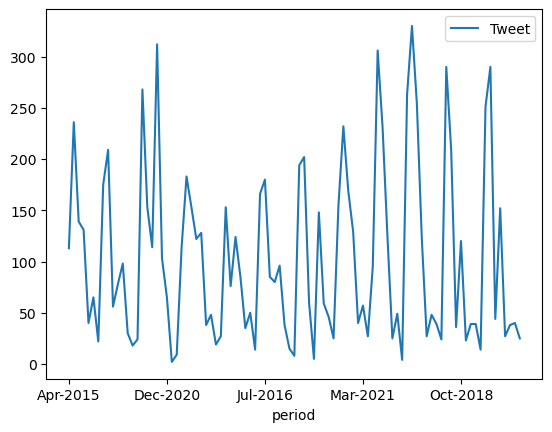

D:\Programmes\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128073 (\N{WHITE RIGHT POINTING BACKHAND INDEX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Programmes\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Programmes\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128253 (\N{FILM PROJECTOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


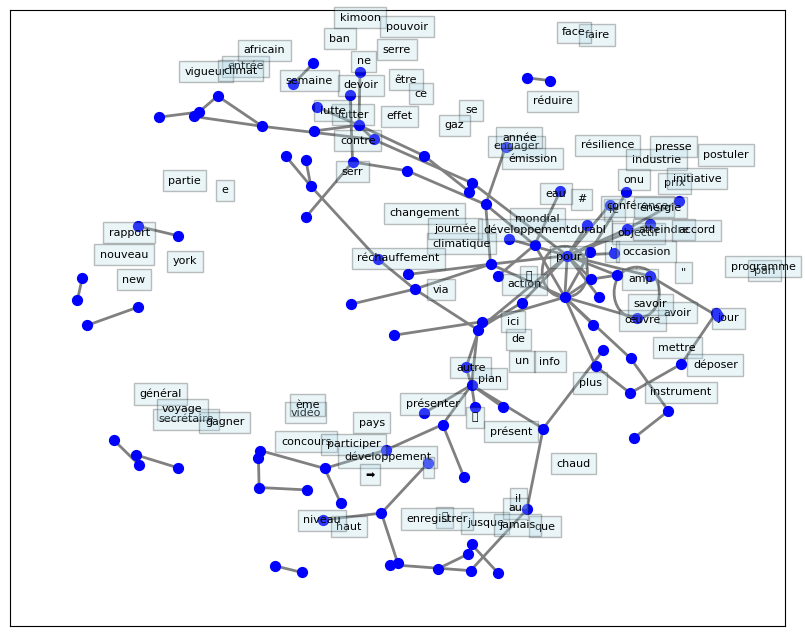

In [117]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=2,
                 edge_color='grey',
                 node_color='blue',
                 node_size=50,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.145
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='lightblue', alpha=0.25),
            horizontalalignment='center', fontsize=8)
    
plt.show()

# 6 - The Similarity Between Documents

## a - Euclidean Distance
Euclidean Distance is probably one of the most known formulas for computing the distance between two points applying the Pythagorean theorem. To get it you just need to subtract the points from the vectors, raise them to squares, add them up and take the square root of them. Did it seem complex? Don’t worry, in the image below it will be easier to understand.
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

In [118]:
from sklearn.metrics.pairwise import euclidean_distances

df_similarity_euclidean = pd.DataFrame(euclidean_distances(vectors, vectors))

In [119]:
df_similarity_euclidean

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.000000,1.212262,1.284898,1.303185,1.334810,1.356351,1.341919,1.379173,1.257338,1.255568,...,1.347195,1.376808,1.365537,1.361469,1.351327,1.355654,1.344509,1.336414,1.339711,1.373035
1,1.212262,0.000000,1.325503,1.317425,1.324916,1.358075,1.327073,1.383491,1.308950,1.307677,...,1.335839,1.369343,1.346949,1.351913,1.331551,1.342914,1.345106,1.334889,1.342726,1.374502
2,1.284898,1.325503,0.000000,1.254044,1.286269,1.319554,1.303269,1.358593,1.275267,1.236091,...,1.300126,1.328055,1.326451,1.316782,1.312086,1.313156,1.307720,1.309681,1.312551,1.366321
3,1.303185,1.317425,1.254044,0.000000,1.250011,1.321862,1.266479,1.363385,1.229622,1.208250,...,1.287010,1.308230,1.318369,1.320592,1.302475,1.292487,1.303038,1.296673,1.309696,1.368864
4,1.334810,1.324916,1.286269,1.250011,0.000000,1.286966,1.216030,1.385591,1.260726,1.233429,...,1.326676,1.362864,1.322236,1.319617,1.333633,1.303967,1.282341,1.290784,1.311439,1.353184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.355654,1.342914,1.313156,1.292487,1.303967,1.321844,1.272767,1.390040,1.298799,1.281406,...,1.222826,1.297206,1.200058,1.182444,1.195523,0.000000,1.212707,1.200961,1.231371,1.318416
89,1.344509,1.345106,1.307720,1.303038,1.282341,1.317290,1.298582,1.370353,1.306647,1.287957,...,1.189675,1.253199,1.231411,1.217357,1.203694,1.212707,0.000000,1.165116,1.203499,1.299527
90,1.336414,1.334889,1.309681,1.296673,1.290784,1.323730,1.291319,1.353417,1.264530,1.216348,...,1.187433,1.237709,1.209650,1.201057,1.164375,1.200961,1.165116,0.000000,1.199184,1.264080
91,1.339711,1.342726,1.312551,1.309696,1.311439,1.330842,1.286414,1.385574,1.300477,1.294688,...,1.190024,1.297654,1.236009,1.241400,1.218265,1.231371,1.203499,1.199184,0.000000,1.164932


In [120]:
mandat = 2
Similar_years=pd.DataFrame()
print("We look for the most similar tweets to: ")
Similar_years ['Euclidean similarity'] = pd.DataFrame(df_similarity_euclidean[mandat])
Similar_years

We look for the most similar tweets to: 


,Euclidean similarity
0,1.284898
1,1.325503
2,0.000000
3,1.254044
4,1.286269
...,...
88,1.313156
89,1.307720
90,1.309681
91,1.312551


In [121]:
Similar_years.sort_values(by=['Euclidean similarity'] ,ascending=True)

,Euclidean similarity
2,0.000000
20,1.221723
22,1.230830
9,1.236091
15,1.236504
...,...
61,1.362814
79,1.364711
92,1.366321
63,1.371717


## b - Manhattan Distance
Although Manhattan distance seems to work okay for high-dimensional data, it is a measure that is somewhat less intuitive than euclidean distance, especially when using in high-dimensional data.

When your dataset has discrete and/or binary attributes, Manhattan seems to work quite well since it takes into account the paths that realistically could be taken within values of those attributes. 

In [122]:
from sklearn.metrics.pairwise import manhattan_distances

df_similarity_manhattan = pd.DataFrame(manhattan_distances(vectors, vectors))

In [127]:
df_similarity_manhattan.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.000000,16.854741,18.243744,20.994138,18.834564,16.234334,21.049511,16.005758,19.736255,19.850404,...,29.577221,20.769306,24.939119,26.865402,28.334467,25.312285,26.395038,27.465638,24.227905,18.438754
1,16.854741,0.000000,19.945582,21.227709,18.703281,17.211742,21.073707,17.316135,20.527547,20.711970,...,28.687060,20.952416,24.402983,26.665179,27.382572,24.852502,26.441537,27.193008,24.300826,19.159507
2,18.243744,19.945582,0.000000,22.455098,20.534604,18.330803,22.790191,18.426281,22.235470,21.616355,...,30.894299,22.658814,26.648917,28.058516,29.372620,26.500053,27.900278,29.180084,25.981389,20.946376
3,20.994138,21.227709,22.455098,0.000000,21.975304,20.925615,23.758362,21.100475,23.418066,23.176157,...,32.356274,24.463052,28.294539,30.261373,31.087016,28.210796,29.984251,31.110644,28.190107,23.625109
4,18.834564,18.703281,20.534604,21.975304,0.000000,16.891938,20.277644,18.405407,21.394433,20.572382,...,30.124635,22.442194,25.550873,27.564753,29.350925,25.496103,27.076534,27.930278,25.177716,19.723823


In [130]:
action = 92
print("We look for the most similar tweets to: ")
Similar_years ['Manhattan similarity'] = pd.DataFrame(df_similarity_manhattan[action])
Similar_years

We look for the most similar tweets to: 


,Euclidean similarity,Manhattan similarity
0,1.284898,18.438754
1,1.325503,19.159507
2,0.000000,20.946376
3,1.254044,23.625109
4,1.286269,19.723823
...,...,...
88,1.313156,24.414617
89,1.307720,26.286470
90,1.309681,26.293873
91,1.312551,22.144394


In [131]:
Similar_years.sort_values(by=['Manhattan similarity'] ,ascending=True)

,Euclidean similarity,Manhattan similarity
92,1.366321,0.000000
12,1.374590,14.160041
54,1.352091,15.828100
7,1.358593,17.754475
5,1.319554,18.154715
...,...,...
76,1.340793,29.879666
58,1.265229,30.268902
46,1.277937,30.325731
50,1.274467,30.439675


## c - Finding similar documents using cosine similarity
Cosine Similarity is a method of calculating the similarity of two vectors by taking the dot product and dividing it by the magnitudes of each vector, as shown by the illustration below:

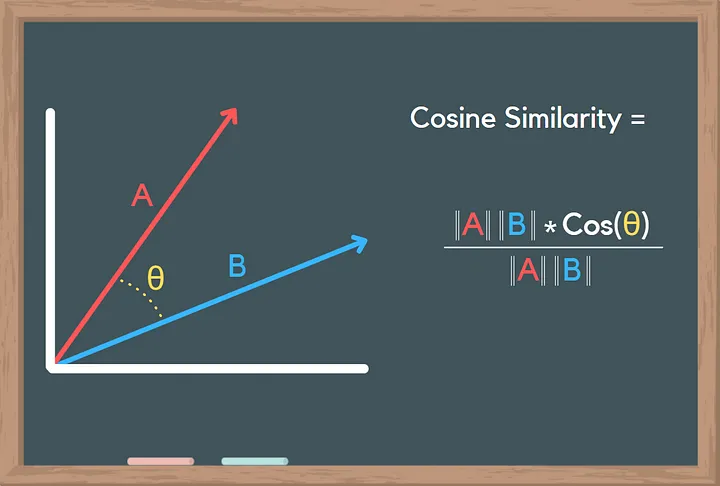

In [132]:
from PIL import Image
import requests
url = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*IhpY-6LYV75983THCpWo-w.png"
Image.open(requests.get(url, stream=True).raw)

In [133]:
from sklearn.metrics.pairwise import cosine_similarity

df_similarity_cosine = pd.DataFrame(cosine_similarity(vectors, vectors))

In [134]:
df_similarity_cosine

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,1.000000,0.265210,0.174518,0.150855,0.109141,0.080156,0.099627,0.048941,0.209551,0.211775,...,0.092533,0.052201,0.067655,0.073201,0.086957,0.081101,0.096148,0.106998,0.102587,0.057388
1,0.265210,1.000000,0.121522,0.132196,0.122299,0.077816,0.119438,0.042976,0.143325,0.144991,...,0.107767,0.062449,0.092864,0.086165,0.113485,0.098291,0.095345,0.109036,0.098544,0.055372
2,0.174518,0.121522,1.000000,0.213687,0.172756,0.129388,0.150745,0.077112,0.186847,0.236040,...,0.154836,0.118135,0.120264,0.133042,0.139216,0.137811,0.144934,0.142367,0.138604,0.066583
3,0.150855,0.132196,0.213687,1.000000,0.218736,0.126341,0.198016,0.070591,0.244015,0.270067,...,0.171803,0.144267,0.130951,0.128019,0.151779,0.164739,0.151046,0.159320,0.142348,0.063106
4,0.109141,0.122299,0.172756,0.218736,1.000000,0.171859,0.260636,0.040069,0.205285,0.239326,...,0.119966,0.071301,0.125846,0.129305,0.110712,0.149835,0.177801,0.166938,0.140064,0.084447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.081101,0.098291,0.137811,0.164739,0.149835,0.126364,0.190032,0.033895,0.156561,0.179000,...,0.252348,0.158628,0.279931,0.300914,0.285362,1.000000,0.264671,0.278847,0.241863,0.130889
89,0.096148,0.095345,0.144934,0.151046,0.177801,0.132373,0.156843,0.061067,0.146337,0.170583,...,0.292336,0.214746,0.241814,0.259021,0.275560,0.264671,1.000000,0.321253,0.275795,0.155615
90,0.106998,0.109036,0.142367,0.159320,0.166938,0.123869,0.166248,0.084131,0.200482,0.260248,...,0.295002,0.234038,0.268373,0.278731,0.322116,0.278847,0.321253,1.000000,0.280979,0.201050
91,0.102587,0.098544,0.138604,0.142348,0.140064,0.114430,0.172569,0.040092,0.154380,0.161891,...,0.291922,0.158046,0.236141,0.229463,0.257915,0.241863,0.275795,0.280979,1.000000,0.321467


In [136]:
action = 2
print("We look for the most yers to: " )
Similar_years ['Cosine similarity'] = pd.DataFrame(df_similarity_cosine[action])
Similar_years

We look for the most yers to: 


,Euclidean similarity,Manhattan similarity,Cosine similarity
0,1.284898,18.438754,0.174518
1,1.325503,19.159507,0.121522
2,0.000000,20.946376,1.000000
3,1.254044,23.625109,0.213687
4,1.286269,19.723823,0.172756
...,...,...,...
88,1.313156,24.414617,0.137811
89,1.307720,26.286470,0.144934
90,1.309681,26.293873,0.142367
91,1.312551,22.144394,0.138604


In [137]:
Similar_years.sort_values(by=['Cosine similarity'] ,ascending=False)

,Euclidean similarity,Manhattan similarity,Cosine similarity
2,0.000000,20.946376,1.000000
20,1.221723,25.756023,0.253696
22,1.230830,24.145517,0.242529
9,1.236091,22.664918,0.236040
15,1.236504,25.257006,0.235529
...,...,...,...
61,1.362814,19.711491,0.071369
79,1.364711,25.718022,0.068782
92,1.366321,0.000000,0.066583
63,1.371717,20.886802,0.059196


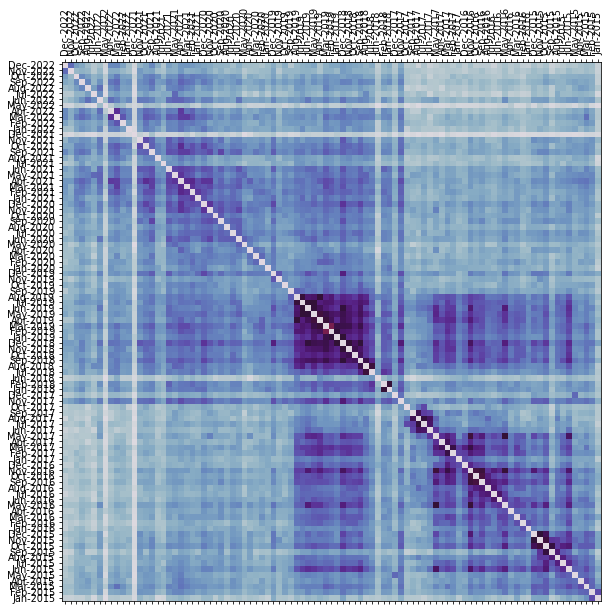

In [161]:
# Create a figure and axes
fig = plt.figure(figsize=(17,10), dpi=70)
ax = fig.add_subplot(111)
# Visualize the matrix with colored squares indicating similarity
ax.matshow(df_similarity_cosine, cmap='twilight', vmin = 0.0, vmax = 1)
# Set regular ticks, one for each book in the collection
ax.set_xticks(range(len(df_results["period"])))
ax.set_yticks(range(len(df_results["period"])))
# Set the tick labels as the book titles
ax.set_xticklabels(df_results["period"])
ax.set_yticklabels(df_results["period"])
# Rotate the labels on the x-axis by 90 degrees
plt.xticks(rotation=90)
plt.show()

# 7 - Clustering
- Clustering is an unsupervised learning problem, it deals with finding a structure in collection of unlabeled data.
- A cluster is a collection of similar documents
- In all cases, the pattern for analysis is essentially the same: extract some features from data in a connection’s profile, define a similarity measurement to compare the features from each profile, and use a clustering technique to group together connections that are “similar enough.”

https://scikit-learn.org/stable/modules/clustering.html

## a- what is a document?
- word clustering : corpus = 1 document qui contient l'ensemble des tweets
- Tweets clustering : corpus = 9000 tweets qu'on tente de clusterisez 
- group clustering : corpus déjà divisé par période (ou autre) par exemple, 1 docuement = l'ensemble des tweets sur une période

In [162]:
# ICI document = les tweets durant un mois
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95,stop_words=stop_words)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
#all_tokens_clean = sum(list_tweets_clean, [])
X = vectorizer.fit_transform(text_list)
feature_names = vectorizer.get_feature_names_out()

## b- Hierarchical Clustering

In [163]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95,stop_words=stop_words)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(text_list)
feature_names = vectorizer.get_feature_names_out()

from sklearn.metrics.pairwise import cosine_similarity
df_similarity_cosine = pd.DataFrame(cosine_similarity(X, X))

In [164]:
df_similarity_cosine

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,1.000000,0.197360,0.231716,0.194094,0.155906,0.091952,0.123426,0.074735,0.237777,0.237044,...,0.138726,0.112922,0.089574,0.109176,0.116394,0.084866,0.113653,0.114080,0.126368,0.091207
1,0.197360,1.000000,0.172341,0.226613,0.201769,0.123291,0.182170,0.086032,0.224378,0.212254,...,0.214125,0.162584,0.169072,0.168832,0.208733,0.161665,0.155694,0.169843,0.161741,0.109564
2,0.231716,0.172341,1.000000,0.244172,0.173965,0.138546,0.135571,0.100584,0.190055,0.250963,...,0.187618,0.178000,0.154198,0.168238,0.189103,0.147090,0.162146,0.148179,0.154156,0.092428
3,0.194094,0.226613,0.244172,1.000000,0.217429,0.114015,0.202373,0.102734,0.228945,0.250938,...,0.213697,0.176061,0.162125,0.171024,0.200186,0.172669,0.159258,0.154626,0.144767,0.089176
4,0.155906,0.201769,0.173965,0.217429,1.000000,0.191703,0.272362,0.058993,0.235592,0.257383,...,0.183809,0.118537,0.167983,0.172611,0.161165,0.150091,0.191053,0.179334,0.159226,0.139670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.084866,0.161665,0.147090,0.172669,0.150091,0.115169,0.218860,0.045832,0.140256,0.170167,...,0.325775,0.325674,0.340853,0.363683,0.359117,1.000000,0.338572,0.332687,0.302943,0.198543
89,0.113653,0.155694,0.162146,0.159258,0.191053,0.136856,0.182963,0.079237,0.139072,0.185164,...,0.372233,0.326842,0.327504,0.337998,0.364518,0.338572,1.000000,0.379191,0.360330,0.205403
90,0.114080,0.169843,0.148179,0.154626,0.179334,0.134731,0.177679,0.086363,0.185485,0.247837,...,0.342098,0.338852,0.337132,0.345151,0.381533,0.332687,0.379191,1.000000,0.356264,0.238076
91,0.126368,0.161741,0.154156,0.144767,0.159226,0.112293,0.187701,0.058265,0.157314,0.158751,...,0.363036,0.306211,0.329676,0.313457,0.336190,0.302943,0.360330,0.356264,1.000000,0.328329


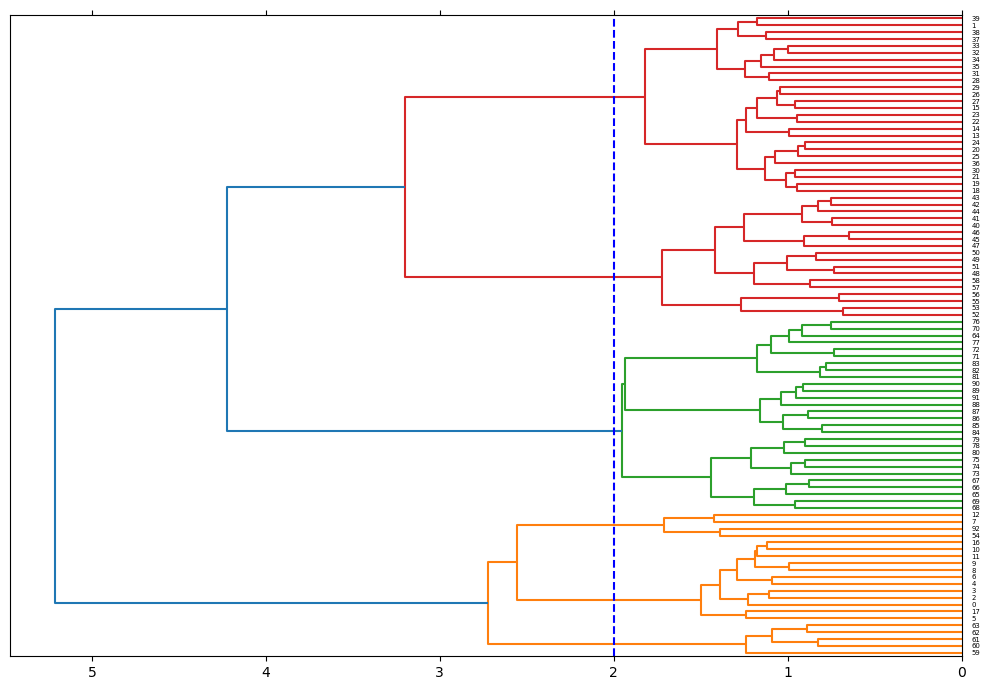

In [201]:
from scipy.cluster.hierarchy import ward, dendrogram
dist = df_similarity_cosine
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(10, 7)) # set size
ax = dendrogram(linkage_matrix, orientation="left");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters
plt.axvline(x=2, color='b', linestyle='--')

#The y-axis contains the docs and x-axis represents the distance between these documents. 
The vertical line with maximum distance is the blue line and hence we can decide a threshold of 3 and $ cut the dendrogram at that point(vertical dotted line).

We have 3 clusters as this line cuts the dendrogram at 3 points. Let’s now apply hierarchical clustering for these clusters.

In [170]:
from sklearn.cluster import AgglomerativeClustering
cluster_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster = cluster_model.fit_predict(X.toarray()).tolist()
# print(type(cluster))
df_results["cluster"] = cluster

df_results

,period,TF Keywords,TFIDF Keywords,cluster
0,Dec-2022,"[changement, chaque, climatique, avoir, monde,...","[chaque, harmonie, évènement, panèt, ècoutez, ...",0
1,Nov-2022,"[elcheikh, charm, direct, plus, climatique, ch...","[charm, elcheikh, direct, préjudice, membre, p...",0
2,Oct-2022,"[climatique, rapport, propre, climat, énergie,...","[climatique, envers, perte, propre, fréquent, ...",0
3,Sep-2022,"[climatique, être, climat, changement, pays, a...","[climatique, éedelairpur, contenu, être, essay...",0
4,Aug-2022,"[climat, climatique, semaine, africain, face, ...","[gabon, librevill, climat, continent, africain...",0
...,...,...,...,...
88,May-2015,"[climatique, amp, climat, changement, minute, ...","[summit, climatique, minute, livre, amendement...",1
89,Apr-2015,"[climatique, changement, énergie, africain, me...","[kilani, africain, climatique, mesure, forum, ...",1
90,Mar-2015,"[climatique, réchauffement, amp, hui, changeme...","[climatique, météo, énergiepropr, mars, réchau...",1
91,Feb-2015,"[climatique, genève, changement, conférence, p...","[genève, mt, climatique, hier, accord, texte, ...",1


In [173]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(23, 5)) # set size

#create scatter plot
plt.scatter(df_results['period'], df_results['cluster'])

#add axis labels
plt.xlabel('period')
plt.ylabel('cluster')

#I use the following to show every 5th x label:
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::5]))
for label in temp:
    label.set_visible(False)

## c- K-means :
https://medium.com/data-folks-indonesia/step-by-step-to-understanding-k-means-clustering-and-implementation-with-sklearn-b55803f519d6

In [177]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [178]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95,stop_words=stop_words)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(text_list)
feature_names = vectorizer.get_feature_names_out()

In [211]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=5, max_iter = 400, init='k-means++', random_state=20)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [212]:
from sklearn.decomposition import PCA
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=20)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [213]:
# assign clusters and pca vectors to our dataframe 
df_cluster = pd.DataFrame()
df_cluster['cluster'] = clusters
df_cluster['x0'] = x0
df_cluster['x1'] = x1

In [214]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df_cluster = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df_cluster.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
info,conf,vidéo,pr,déposer,auprès,instrument,stage,ds,amp

Cluster 1
mondial,degré,faveur,climat,climatique,lors,développementdurabl,plus,via,amp

Cluster 2
action,heure,devoir,mondial,climat,pouvoir,plus,contre,tout,climatique

Cluster 3
protocole,doha,concours,vidéo,ban,conférence,amendement,pari,site,amp

Cluster 4
crise,action,impact,chaque,régional,degré,fraction,climat,changement,climatique


In [215]:
# map clusters to appropriate labels 
cluster_map = {i:'Cluster '+ str(i+1) for i in range(0, 9)}
# apply mapping
df_cluster['cluster'] = df_cluster['cluster'].map(cluster_map)

In [216]:
df_cluster

,cluster,x0,x1
0,Cluster 5,-0.265913,0.138760
1,Cluster 3,-0.162281,0.092724
2,Cluster 5,-0.247137,0.100454
3,Cluster 5,-0.225108,0.076330
4,Cluster 5,-0.199232,0.171588
...,...,...,...
88,Cluster 4,0.214501,0.080873
89,Cluster 4,0.215745,0.051174
90,Cluster 4,0.204627,0.006837
91,Cluster 4,0.223309,0.078243


In [217]:
df_cluster.groupby(clusters).count()

,cluster,x0,x1
0,15,15,15
1,21,21,21
2,28,28,28
3,17,17,17
4,12,12,12


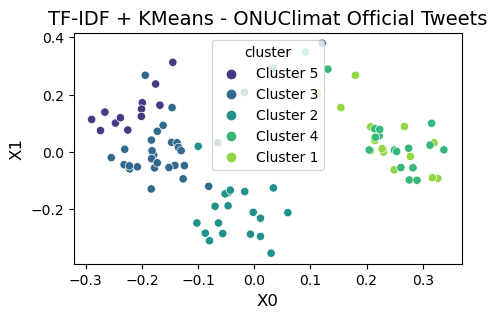

In [218]:
# set image size
plt.figure(figsize=(5, 3))
# set a title
plt.title("TF-IDF + KMeans - ONUClimat Official Tweets", fontdict={"fontsize": 14})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 12})
plt.ylabel("X1", fontdict={"fontsize": 12})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_cluster, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [219]:
#Evaluate Clustering Performance
from sklearn import metrics
X = vectorizer.fit_transform(text_list)
# Compute DBI score
dbi = metrics.davies_bouldin_score(X.toarray(), clusters)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X.toarray(), clusters , metric='cosine')

# Compute the Calinski and Harabasz score.
chs = metrics.calinski_harabasz_score(X.toarray(), clusters)

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss,"\nCalinski and Harabasz Score: ", chs)


DBI Score:  4.486660771884695 
Silhoutte Score:  0.02856746360646431 
Calinski and Harabasz Score:  2.4696400725844647


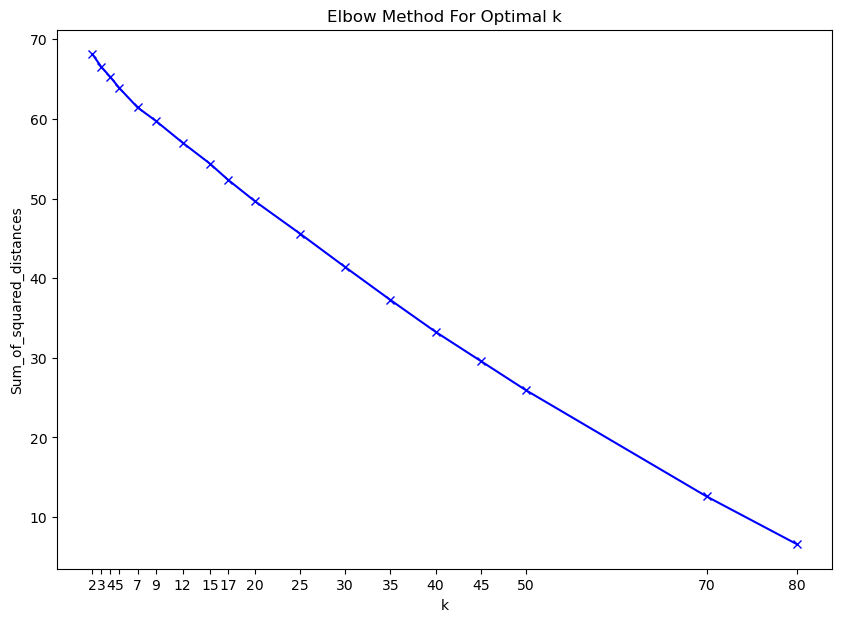

In [220]:
# evaluation with Elbow method:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = [ 2,3,4, 5,7,9,12,15,17,20,25,30,35,40,45,50,70,80]
for k in K:
    X = vectorizer.fit_transform(text_list)
    km = KMeans(n_clusters=k, max_iter = 400, init='k-means++')
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

fig, ax = plt.subplots(figsize=(10, 7)) # set size
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xticks(K)

plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

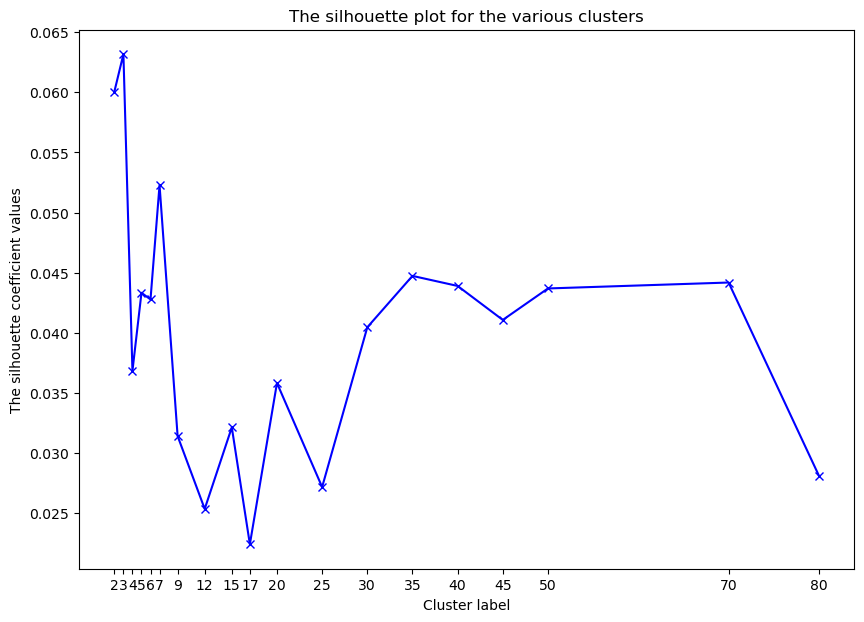

In [221]:
# evaluation with Silhoutte method:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_silhouette_score = []
K = [2,3,4,5,6,7,9,12,15,17,20,25,30,35,40,45,50,70,80]

for k in K:
    X = vectorizer.fit_transform(text_list)
    km = KMeans(n_clusters=k, max_iter=400, n_init=10)
    km = km.fit(X)
    ss = metrics.silhouette_score(X.toarray(), km.labels_ , metric='cosine')
    Sum_of_silhouette_score.append(ss)

fig, ax = plt.subplots(figsize=(10, 7)) # set size
    
plt.plot(K, Sum_of_silhouette_score, 'bx-')
plt.xticks(K)
plt.xlabel("Cluster label")
plt.ylabel("The silhouette coefficient values")
plt.title('The silhouette plot for the various clusters')
plt.show()

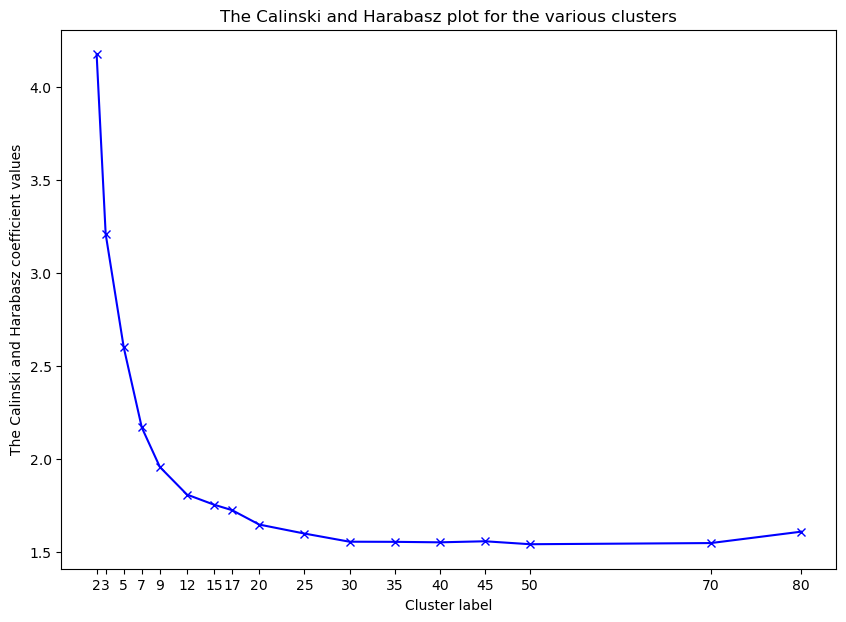

In [222]:
# evaluation with Calinski and Harabasz score:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_CH_score = []
K = [2,3,5,7,9,12,15,17,20,25,30,35,40,45,50,70,80]

for k in K:
    X = vectorizer.fit_transform(text_list)
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    ch = metrics.calinski_harabasz_score(X.toarray(), km.labels_)
    Sum_of_CH_score.append(ch)

fig, ax = plt.subplots(figsize=(10, 7)) # set size    
plt.plot(K, Sum_of_CH_score, 'bx-')
plt.xticks(K)
plt.xlabel("Cluster label")
plt.ylabel("The Calinski and Harabasz coefficient values")
plt.title('The Calinski and Harabasz plot for the various clusters')
plt.show()

# 8 - Sentiment Analysis
Sentiment Analysis is a use case of Natural Language Processing (NLP) and comes under the category of text classification. To put it simply, Sentiment Analysis involves classifying a text into various sentiments, such as positive or negative, Happy, Sad or Neutral, etc. Thus, the ultimate goal of sentiment analysis is to decipher the underlying mood, emotion, or sentiment of a text. This is also known as Opinion Mining.

NLTK provides a simple rule-based model for general sentiment analysis called VADER, which stands for “Valence Aware Dictionary and Sentiment Reasoner” (Hutto & Gilbert, 2014).

http://varianceexplained.org/r/trump-tweets/


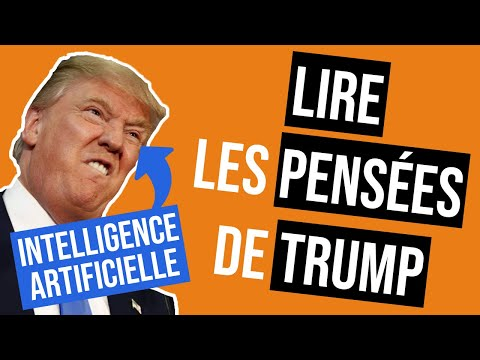

In [223]:
from IPython.display import YouTubeVideo
YouTubeVideo("4x7ah-erKiw")

In [224]:
# import libraries
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\liseb\AppData\Roaming\nltk_data...


True

In [225]:
list_tweets_clean[0]

['❓',
 'gouvernement',
 'engager',
 'protéger',
 'terre',
 'eau',
 'considérer',
 'comme',
 'important',
 'é',
 'de',
 'ici',
 'que',
 'estce',
 'cela',
 'vouloir',
 'dire',
 'voir']

In [226]:
list_tweets_clean_join = [' '.join([token for token in list_tweets_clean[i]]) for i in range(len(list_tweets_clean))]

In [227]:
list_tweets_clean_join [0]

'❓ gouvernement engager protéger terre eau considérer comme important é de ici que estce cela vouloir dire voir'

In [228]:
len(list_tweets_clean_join)

9630

In [229]:
#Créer un copie de Travail
df_sentiment =df_nd[['Date','period','year','Source']] .copy()
df_sentiment.shape

(9630, 4)

In [230]:
df_sentiment['Tweet_clean']=list_tweets_clean_join


In [231]:
df_sentiment.head()

,Date,period,year,Source,Tweet_clean
0,2022-12-21 11:25:11+00:00,Dec-2022,2022,Twitter Web App,❓ gouvernement engager protéger terre eau cons...
1,2022-12-18 08:44:31+00:00,Dec-2022,2022,Twitter for Android,❌ million personne déplacer faire de évènement...
2,2022-12-14 13:51:39+00:00,Dec-2022,2022,Twitter for Advertisers,découvrir 🔟 programme mond entier 🌍 récompense...
3,2022-12-12 15:41:00+00:00,Dec-2022,2022,Twitter Web App,❓ perte gaspillag alimentaire représenter entr...
4,2022-12-09 10:20:00+00:00,Dec-2022,2022,Twitter Web App,« ne y avoir planète b ce être réparer monde »


In [232]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

In [233]:
# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)
    score = scores['compound']
    
    if score < 0:
        sentiment = "Negative"
    elif score == 0:
        sentiment =  "Neutral"
    else:
        sentiment =  "Positive"

    return sentiment

In [234]:
# create get_sentiment function

def get_sentiment_score(text):

    scores = analyzer.polarity_scores(text)
    score = scores['compound']
    
    if score > 0:
        return 1
    else:
        return 0

In [235]:
# apply get_sentiment function

df_sentiment['sentiment'] = df_sentiment['Tweet_clean'].apply(get_sentiment)
df_sentiment['scores'] = df_sentiment['Tweet_clean'].apply(get_sentiment_score)

In [236]:
df_sentiment.head()

,Date,period,year,Source,Tweet_clean,sentiment,scores
0,2022-12-21 11:25:11+00:00,Dec-2022,2022,Twitter Web App,❓ gouvernement engager protéger terre eau cons...,Negative,0
1,2022-12-18 08:44:31+00:00,Dec-2022,2022,Twitter for Android,❌ million personne déplacer faire de évènement...,Positive,1
2,2022-12-14 13:51:39+00:00,Dec-2022,2022,Twitter for Advertisers,découvrir 🔟 programme mond entier 🌍 récompense...,Neutral,0
3,2022-12-12 15:41:00+00:00,Dec-2022,2022,Twitter Web App,❓ perte gaspillag alimentaire représenter entr...,Negative,0
4,2022-12-09 10:20:00+00:00,Dec-2022,2022,Twitter Web App,« ne y avoir planète b ce être réparer monde »,Neutral,0


In [237]:
# vérifiant les sentiments ?
df_sentiment.groupby(['sentiment']).nunique() #plus 6000 tweets neutres

,Date,period,year,Source,Tweet_clean,scores
sentiment,,,,,,
Negative,947,89,8,8,858,1
Neutral,7353,93,8,11,6687,1
Positive,1327,89,8,9,1226,1


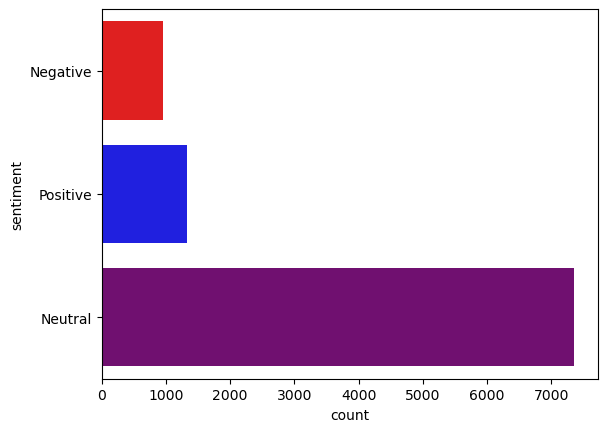

In [240]:
#Visualize number of tweet by sentiment
sns.countplot(y='sentiment', 
             data=df_sentiment, 
             palette=['red',"blue", 'purple']);

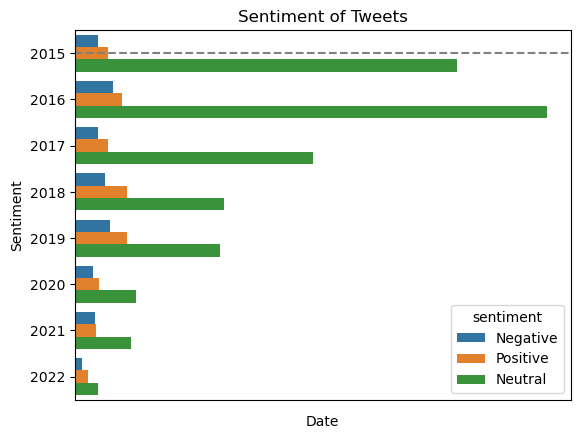

In [241]:
# Lineplot
g = sns.countplot(y='year', hue='sentiment', data=df_sentiment )

g.set(xticklabels=[]) 
g.set(title='Sentiment of Tweets')
g.set(xlabel="Date")
g.set(ylabel="Sentiment")
g.tick_params(bottom=False)

g.axhline(0, ls='--', c = 'grey');

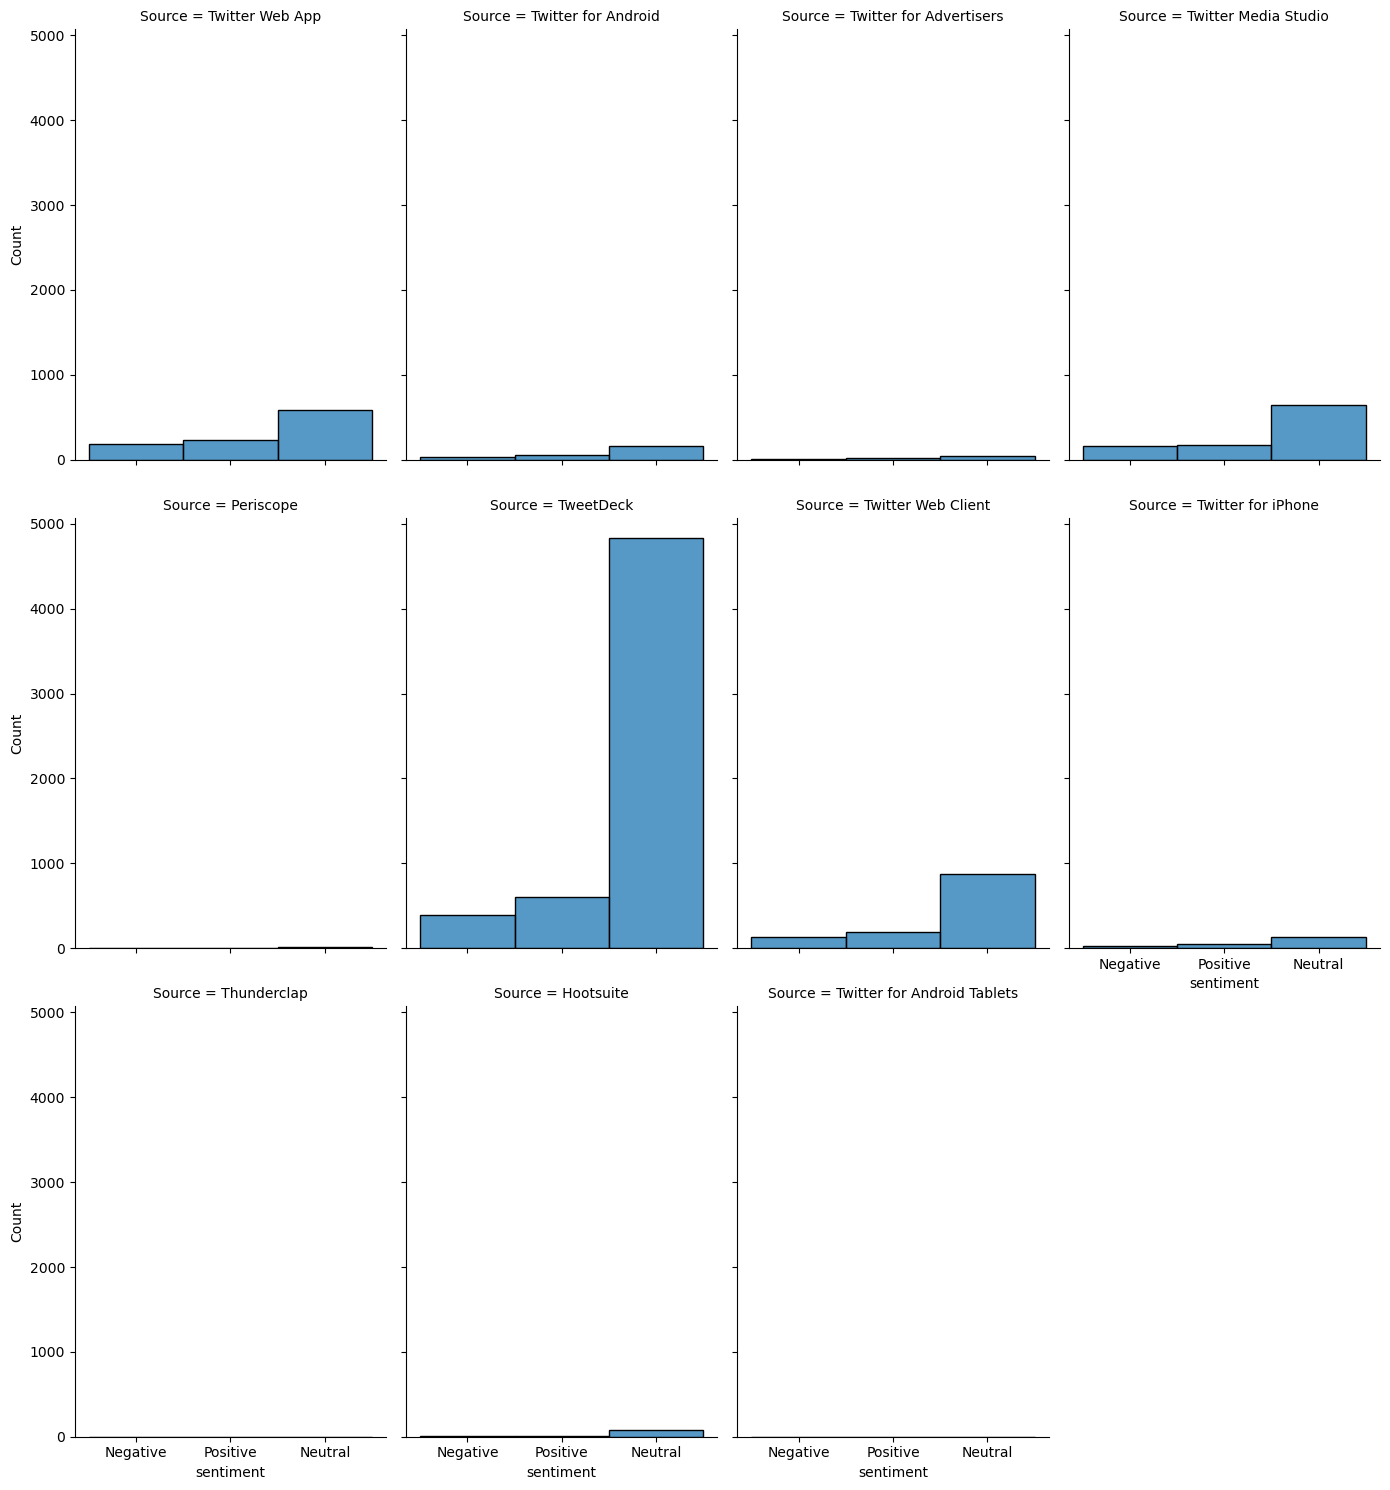

In [236]:
# A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

sns.displot(data = df_sentiment, x='sentiment', col="Source", col_wrap=4, height=5, aspect=0.7, palette = colors)
plt.show()

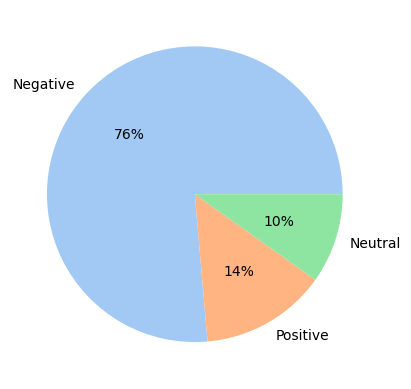

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
tags   = df_sentiment['sentiment'].value_counts()
labels = df_sentiment['sentiment'].unique()
#create pie chart
plt.pie(tags, labels=labels, colors = colors, autopct='%.0f%%')
plt.show()

In [243]:
tags = df_sentiment.groupby('year')['sentiment'].describe()

In [244]:
tags

,count,unique,top,freq
year,,,,
2015,2112,3,Neutral,1838
2016,2686,3,Neutral,2273
2017,1418,3,Neutral,1147
2018,1116,3,Neutral,720
2019,1119,3,Neutral,700
2020,495,3,Neutral,293
2021,468,3,Neutral,270
2022,216,3,Neutral,114


In [245]:
#create pivot table
df_pivot = pd.pivot_table(df_sentiment, values='Source', columns='year', index='sentiment',
                          aggfunc='count')

In [246]:
df_pivot

year,2015,2016,2017,2018,2019,2020,2021,2022
sentiment,,,,,,,,
Negative,114,184,113,147,170,86,97,36
Neutral,1838,2273,1147,720,700,293,270,114
Positive,160,229,158,249,249,116,101,66


array([[<AxesSubplot:ylabel='2015'>, <AxesSubplot:ylabel='2016'>],
       [<AxesSubplot:ylabel='2017'>, <AxesSubplot:ylabel='2018'>],
       [<AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>],
       [<AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>]],
      dtype=object)

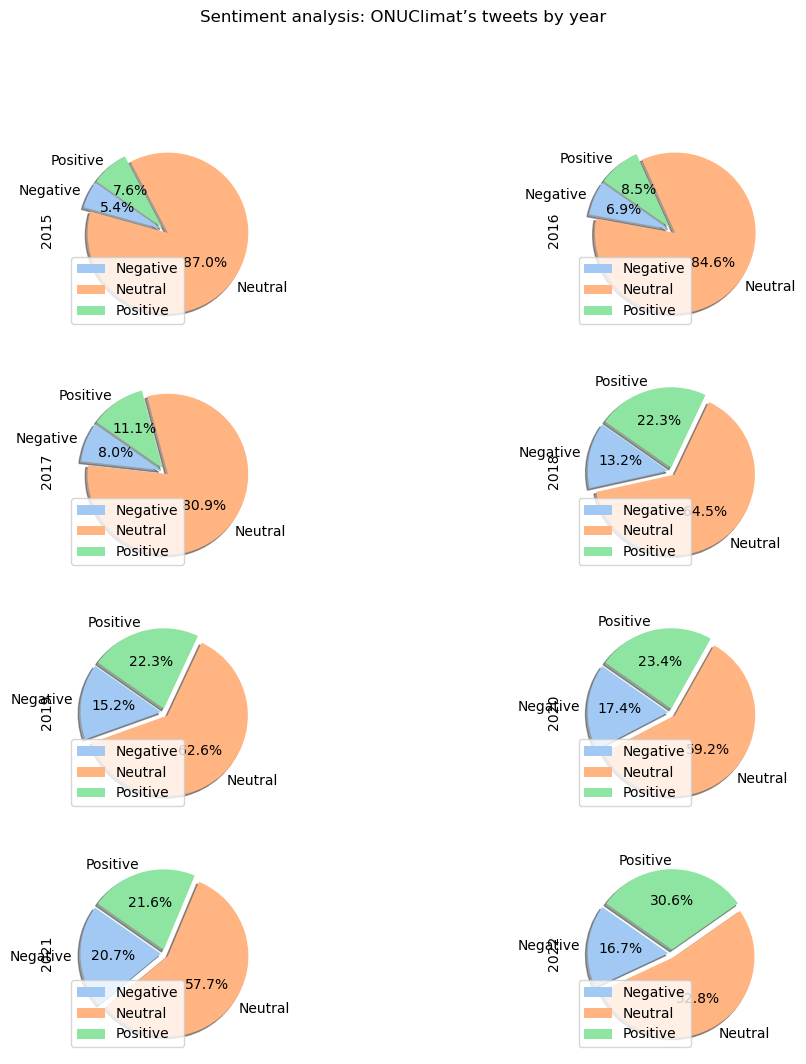

In [248]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

df_pivot.plot(kind='pie', autopct='%1.1f%%', shadow=True, 
              colors=colors,  subplots=True, explode=explode,
              layout=(4,2), figsize=(12,12), sharex=False, sharey=False,
              startangle=-215, 
              xlabel=None,
              ylabel=None,
              title='Sentiment analysis: ONUClimat’s tweets by year')

In [249]:
#create pivot table
df_pivot2 = pd.pivot_table(df_sentiment, values='scores', columns='Source', index='sentiment',
                          aggfunc='count')
df_pivot2

Source,Hootsuite,Periscope,Thunderclap,TweetDeck,Twitter Media Studio,Twitter Web App,Twitter Web Client,Twitter for Advertisers,Twitter for Android,Twitter for Android Tablets,Twitter for iPhone
sentiment,,,,,,,,,,,
Negative,9.0,NaN,NaN,391.0,159.0,183.0,136.0,11.0,30.0,NaN,28.0
Neutral,74.0,13.0,2.0,4829.0,644.0,580.0,877.0,37.0,161.0,2.0,136.0
Positive,5.0,NaN,1.0,608.0,175.0,229.0,191.0,19.0,53.0,NaN,47.0


array([[<AxesSubplot:ylabel='Hootsuite'>,
        <AxesSubplot:ylabel='Periscope'>,
        <AxesSubplot:ylabel='Thunderclap'>],
       [<AxesSubplot:ylabel='TweetDeck'>,
        <AxesSubplot:ylabel='Twitter Media Studio'>,
        <AxesSubplot:ylabel='Twitter Web App'>],
       [<AxesSubplot:ylabel='Twitter Web Client'>,
        <AxesSubplot:ylabel='Twitter for Advertisers'>,
        <AxesSubplot:ylabel='Twitter for Android'>],
       [<AxesSubplot:ylabel='Twitter for Android Tablets'>,
        <AxesSubplot:ylabel='Twitter for iPhone'>, <AxesSubplot:>]],
      dtype=object)

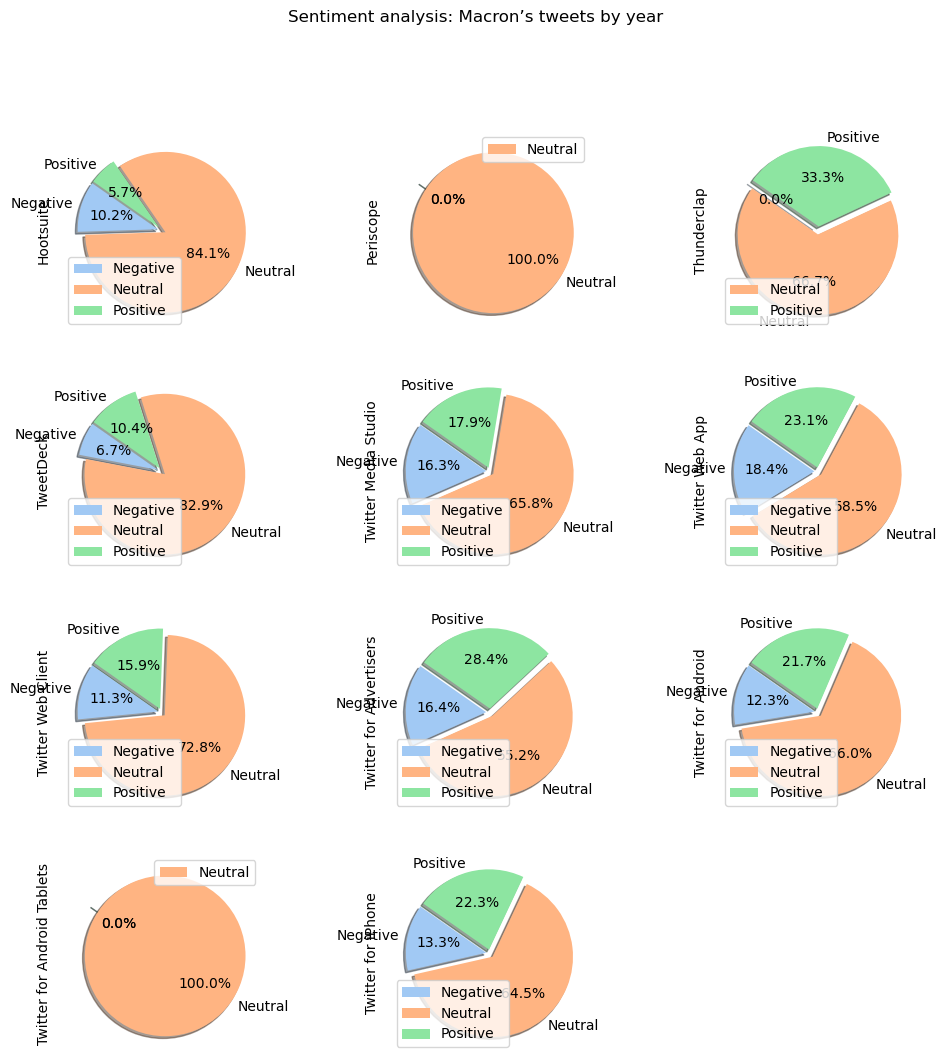

In [250]:
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05)

df_pivot2.plot(kind='pie', autopct='%1.1f%%', shadow=True, 
              colors=colors,  subplots=True, explode=explode,
              layout=(4,3), figsize=(12,12), sharex=False, sharey=False,
              startangle=-215, 
              xlabel=None,
              ylabel=None,
              title='Sentiment analysis: Macron’s tweets by year')

In [251]:
list_positive_Tweets = df_sentiment[df_sentiment['sentiment']=='Positive']['Tweet_clean'].tolist()
list_negative_Tweets = df_sentiment[df_sentiment['sentiment']=='Negative']['Tweet_clean'].tolist()

In [252]:
# Lets Tokenize the Text
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize

#Create a list of all words
all_Positive_tweets = ' '.join([tweet for tweet in df_sentiment[df_sentiment['sentiment']=='Positive']['Tweet_clean']])
all_Negative_tweets = ' '.join([tweet for tweet in df_sentiment[df_sentiment['sentiment']=='Negative']['Tweet_clean']])

In [253]:
all_Positive_tweets[0:100]

'❌ million personne déplacer faire de évènement météorologique extrême chaque année ❌ sans action urg'

In [254]:
all_Negative_tweets[0:100]

'❓ gouvernement engager protéger terre eau considérer comme important é de ici que estce cela vouloir'

In [255]:
# Lets Tokenize the Text
Positive_tokens =word_tokenize(all_Positive_tweets, language="french")
Negative_tokens =word_tokenize(all_Negative_tweets, language="french")

In [256]:
# print the 20 most commons tokens
from collections import Counter
print("Positive words: ----", Counter(Positive_tokens).most_common(20))
print("Negative words: ----", Counter(Negative_tokens).most_common(20))

Positive words: ---- [('le', 600), ("'", 530), ('de', 365), ('amp', 274), ('``', 229), ('👉', 195), ('avoir', 189), ('solution', 188), ('#', 172), ('grand', 169), ('engagement', 161), ('se', 157), ('engager', 153), ('plus', 147), ('pour', 140), ('climatique', 139), ('mondial', 137), ('faire', 132), ('️', 123), ('être', 122)]
Negative words: ---- [('tout', 480), ('le', 339), ("'", 319), ('``', 229), ('amp', 175), ('de', 170), ('dire', 140), ('avoir', 132), ('#', 126), ('👉', 122), ('être', 119), ('ce', 109), ('climatique', 106), ('plus', 96), ('devoir', 95), ('️', 95), ('mondial', 93), ('«', 80), ('faire', 80), ('»', 80)]


In [257]:
from nltk.corpus import stopwords
stop_words_english  = set(stopwords.words('english'))
stop_words_french   = set(stopwords.words('french'))
stop_words_specific = ["'", "le","ce","de","cest","celui","ne"]
stop_words          = set(stopwords.words('french') + stopwords.words('english') + stop_words_specific)

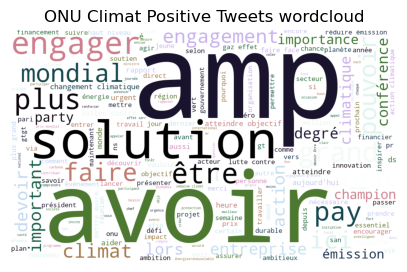

In [258]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width= 1000, height = 600, max_words=200,
                      random_state=1, background_color='White', colormap='cubehelix',
                      collocations=True, stopwords = stop_words).generate(all_Positive_tweets)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("ONU Climat Positive Tweets wordcloud")
plt.show()

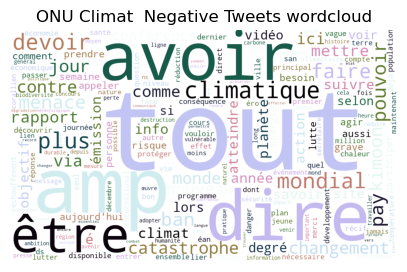

In [259]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
wordcloud = WordCloud(width= 1000, height = 600, max_words=200,
                      random_state=1, background_color='White', colormap='cubehelix',
                      collocations=False, stopwords = stop_words).generate(all_Negative_tweets)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud) 
plt.axis("off")
plt.title("ONU Climat  Negative Tweets wordcloud")
plt.show()

In [260]:
#Lets look at the positive Tweets
text_positive = nltk.Text(Positive_tokens)
text_negative = nltk.Text(Negative_tokens)

In [261]:
text_positive.concordance("climat")

Displaying 25 of 91 matches:
rer glacier disponibilité leau doux climat évolution si chemin reste encore fa
e impression ème semaine conférence climat le onu charm elcheikh 📸 retrouver p
m elcheikh 📢 nouveau rapport de onu climat 📢 plan climat pays montrer engageme
ouveau rapport de onu climat 📢 plan climat pays montrer engagement pays insuff
réjudice secrétaire exécutif de onu climat dynamique fort océan nécessaire lor
lution » secrétaire exécutif de onu climat se adresser média marg ' le occasio
urager nouveau mobilité respectueux climat le environnement 🍃 éemondialesansvo
 » secrétaire exécutif adjoint donu climat 🗣 ️ comment communiquer collaborati
gence » lydia halidi jeune militant climat le union comore que estce ce être j
 secrétaire exécutif intérim le onu climat comment le afrique faire face défi 
ique 🗓 ️rendezvous semaine africain climat direct librevill gabon 🇬 🇦 📽 ️ retr
veznou partir lundi juillet semaine climat de amérique latin caraïbe depuis sa
limatique solution régi

In [262]:
text_negative.concordance("climat")

Displaying 25 of 38 matches:
t climatique ⏩ action océanclimat ⏪ climat « le inaction avoir grave conséquen
éroulement session le action faveur climat ne être le affaire seul gouvernemen
 nord tout premier semaine regional climat region mener commencer aujourd'hui 
 🌎 appeler tout tout prendre action climat 🔴 rapport forum économique mondial 
port forum économique mondial place climat tête risaue mondial dernier rapport
 officiel tout premier fois semaine climat moyenorier de afrique nord tenir fé
r mars gtgt nouveau ère coopération climat région ltlt 🔗 🌏 🌍 perte é 🌎 dégrada
 un jour ➕ chaud 🌡 histoire rapport climat sans ambiguïté si renforcer radical
ctif ' hors portée déterminer futur climat besoin tout urgence ➕ ambitieux ava
 💙 mai débuter ère semaine régional climat celui de amérique latin caraïbe quo
araïbe quoi servir semaine régional climat ❓ comment déroulentelle ❓ ontelle l
t ❓ gtgt ltlt jeune femme le action climat lancer message suivre « sousestimer
ire capacité de être le

In [263]:
# Frequent collocations in the text (usually meaningful phrases)
print("Collocation for Positive Tweets: -------------")
text_positive.collocations()
print("Collocation for Negative Tweets: -------------")
text_negative.collocations()

Collocation for Positive Tweets: -------------
lutter contre; changement climatique; atteindre objectif; gaz effet;
lutte contre; haut niveau; mettre œuvre; faire face; effet serr; charm
elcheikh; foot espagnol; fonder nature; apple store; réduire émission;
compenser reste; amérique latin; plus grand; équipe foot; gagner
course; transition énergétique
Collocation for Negative Tweets: -------------
ban kimoon; changement climatique; lutte contre; récif corallien;
lutter contre; atteindre objectif; hausse température; vague chaleur;
tout info; mettre œuvre; jamais enregistrer; million personne; sans
précédent; faire face; risque catastrophe; secrétaire général;
retrouver tout; note logistique; chaud jamais; sécurité alimentaire


In [264]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

# Ngrams with the specific name "france"
name_filter = lambda *w: 'climat' not in w

## Bigrams
finder_positive = nltk.BigramCollocationFinder.from_words(text_positive)
finder_negative = nltk.BigramCollocationFinder.from_words(text_positive)

# only bigrams that contain 'retraite'
finder_positive.apply_ngram_filter(name_filter)
finder_negative.apply_ngram_filter(name_filter)

# return the 10 bi-grams with the highest student ratio
print("Top 10 bigrams for Positive Tweets: ---",finder_positive.nbest(bigram_measures.student_t,10))
print("Top 10 bigrams for Negative Tweets: ---",finder_negative.nbest(bigram_measures.student_t,10))

Top 10 bigrams for Positive Tweets: --- [('semaine', 'climat'), ('onu', 'climat'), ('vert', 'climat'), ('conférence', 'climat'), ('action', 'climat'), ('climat', 'le'), ('champion', 'climat'), ('climat', '«'), ('respectueux', 'climat'), ('matière', 'climat')]
Top 10 bigrams for Negative Tweets: --- [('semaine', 'climat'), ('onu', 'climat'), ('vert', 'climat'), ('conférence', 'climat'), ('action', 'climat'), ('climat', 'le'), ('champion', 'climat'), ('climat', '«'), ('respectueux', 'climat'), ('matière', 'climat')]
